In [1]:
import pandas as pd
import numpy as np
import csv
import os
import matplotlib.pyplot as plt
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import copy

In [2]:
os.chdir('C:/Users/shiva/Desktop/Master_Thesis/final-data')
data=pd.read_csv('dt_final_new_features.csv')

C:\Users\shiva\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (3,4) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
data.head()

,Unnamed: 0,sentence,outlet,topic,type,num_sent,article,Bias_words,text,text_low,...,ne_NORP_context,ne_ORDINAL_context,ne_ORG_context,ne_PERCENT_context,ne_PERSON_context,ne_PRODUCT_context,ne_QUANTITY_context,ne_TIME_context,ne_WORK_OF_ART_context,ne_LANGUAGE_context
0,2,"In the Trumpian pandemic moment, gun purchases...",Alternet,gun control,left,1,"In the Trumpian pandemic moment, gun purchases...",['soared'],Trumpian,trumpian,...,0,0,0,0,0,0,0,0,0,0
1,3,"In the Trumpian pandemic moment, gun purchases...",Alternet,gun control,left,1,"In the Trumpian pandemic moment, gun purchases...",['soared'],pandemic,pandemic,...,1,0,0,0,0,0,0,0,0,0
2,4,"In the Trumpian pandemic moment, gun purchases...",Alternet,gun control,left,1,"In the Trumpian pandemic moment, gun purchases...",['soared'],moment,moment,...,1,0,0,0,0,0,0,0,0,0
3,5,"In the Trumpian pandemic moment, gun purchases...",Alternet,gun control,left,1,"In the Trumpian pandemic moment, gun purchases...",['soared'],gun,gun,...,0,0,0,0,0,0,0,0,0,0
4,6,"In the Trumpian pandemic moment, gun purchases...",Alternet,gun control,left,1,"In the Trumpian pandemic moment, gun purchases...",['soared'],purchases,purchases,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df = data[[
 'label4',
 'glove_vec300_norm', # normalize
 'tfidf_art', # normalize
 'negative_conc',
 'positive_conc',
 'weak_subj',
 'strong_subj',
 'hyperbolic_terms',
 'attitude_markers',
 'kill_verbs',
 'bias_lexicon',
 'action_verbs',
 'comparative_forms',
 'modal_adverbs',
 'manner_adverbs',
 'superlative_forms',
 'assertive_verbs',
 'factive_verbs',
 'report_verbs',
 'implicative_verbs',
 'hedges',
 'boosters',
 'affect ',
 'posemo ',
 'negemo ',
 'anx ',
 'anger ',
 'sad ',
 'social ',
 'family ',
 'friend ',
 'female ',
 'male ',
 'cogproc ',
 'insight ',
 'cause ',
 'discrep ',
 'tentat ',
 'certain ',
 'differ ',
 'percept ',
 'see ',
 'hear ',
 'feel ',
 'bio ',
 'body ',
 'health ',
 'sexual ',
 'ingest ',
 'drives ',
 'affiliation ',
 'achieve ',
 'power ',
 'reward ',
 'risk ',
 'focuspast ',
 'focuspresent ',
 'focusfuture ',
 'relativ ',
 'motion ',
 'space ',
 'time ',
 'work ',
 'leisure ',
 'home ',
 'money ',
 'relig ',
 'death ',
 'informal ',
 'swear ',
 'netspeak ',
 'assent ',
 'nonflu ',
 'filler ',
 'pos_ADJ',
 'pos_ADP',
 'pos_ADV',
 'pos_AUX',
 'pos_DET',
 'pos_INTJ',
 'pos_NOUN',
 'pos_PRON',
 'pos_PROPN',
 'pos_SCONJ',
 'pos_VERB',
 'pos_X',
 'dep_ROOT',
 'dep_acl',
 'dep_acomp',
 'dep_advcl',
 'dep_advmod',
 'dep_agent',
 'dep_amod',
 'dep_appos',
 'dep_attr',
 'dep_aux',
 'dep_auxpass',
 'dep_case',
 'dep_cc',
 'dep_ccomp',
 'dep_compound',
 'dep_conj',
 'dep_csubj',
 'dep_dative',
 'dep_dep',
 'dep_det',
 'dep_dobj',
 'dep_expl',
 'dep_intj',
 'dep_mark',
#  'dep_meta',
 'dep_neg',
 'dep_nmod',
 'dep_npadvmod',
 'dep_nsubj',
 'dep_nsubjpass',
 'dep_nummod',
 'dep_oprd',
 'dep_parataxis',
 'dep_pcomp',
 'dep_pobj',
 'dep_poss',
 'dep_preconj',
 'dep_predet',
 'dep_prep',
 'dep_prt',
 'dep_punct',
 'dep_quantmod',
 'dep_relcl',
 'dep_xcomp',
 'ne_CARDINAL',
 'ne_DATE',
 'ne_EVENT',
 'ne_FAC',
 'ne_GPE',
 'ne_LANGUAGE',
 'ne_LAW',
 'ne_LOC',
 'ne_MONEY',
 'ne_NORP',
 'ne_ORDINAL',
 'ne_ORG',
 'ne_PERCENT',
 'ne_PERSON',
 'ne_PRODUCT',
 'ne_QUANTITY',
 'ne_TIME',
 'ne_WORK_OF_ART',
 'negative_conc_context',
 'positive_conc_context',
 'weak_subj_context',
 'strong_subj_context',
 'hyperbolic_terms_context',
 'attitude_markers_context',
 'kill_verbs_context',
 'bias_lexicon_context',
 'action_verbs_context',
 'comparative_forms_context',
 'modal_adverbs_context',
 'manner_adverbs_context',
 'superlative_forms_context',
 'assertive_verbs_context',
 'factive_verbs_context',
 'report_verbs_context',
 'implicative_verbs_context',
 'hedges_context',
 'boosters_context',
 'affect _context',
 'posemo _context',
 'negemo _context',
 'anx _context',
 'anger _context',
 'sad _context',
 'social _context',
 'family _context',
 'friend _context',
 'female _context',
 'male _context',
 'cogproc _context',
 'insight _context',
 'cause _context',
 'discrep _context',
 'tentat _context',
 'certain _context',
 'differ _context',
 'percept _context',
 'see _context',
 'hear _context',
 'feel _context',
 'bio _context',
 'body _context',
 'health _context',
 'sexual _context',
 'ingest _context',
 'drives _context',
 'affiliation _context',
 'achieve _context',
 'power _context',
 'reward _context',
 'risk _context',
 'focuspast _context',
 'focuspresent _context',
 'focusfuture _context',
 'relativ _context',
 'motion _context',
 'space _context',
 'time _context',
 'work _context',
 'leisure _context',
 'home _context',
 'money _context',
 'relig _context',
 'death _context',
 'informal _context',
 'swear _context',
 'netspeak _context',
 'assent _context',
 'nonflu _context',
 'filler _context',
 'pos_ADJ_context',
 'pos_ADP_context',
 'pos_ADV_context',
 'pos_AUX_context',
 'pos_DET_context',
 'pos_INTJ_context',
 'pos_NOUN_context',
 'pos_PRON_context',
 'pos_PROPN_context',
 'pos_SCONJ_context',
 'pos_VERB_context',
 'pos_X_context',
 'dep_ROOT_context',
 'dep_acl_context',
 'dep_acomp_context',
 'dep_advcl_context',
 'dep_advmod_context',
 'dep_agent_context',
 'dep_amod_context',
 'dep_appos_context',
 'dep_attr_context',
 'dep_aux_context',
 'dep_auxpass_context',
 'dep_case_context',
 'dep_cc_context',
 'dep_ccomp_context',
 'dep_compound_context',
 'dep_conj_context',
 'dep_csubj_context',
 'dep_dative_context',
 'dep_dep_context',
 'dep_det_context',
 'dep_dobj_context',
 'dep_expl_context',
 'dep_intj_context',
 'dep_mark_context',
#  'dep_meta_context',
 'dep_neg_context',
 'dep_nmod_context',
 'dep_npadvmod_context',
 'dep_nsubj_context',
 'dep_nsubjpass_context',
 'dep_nummod_context',
 'dep_oprd_context',
 'dep_parataxis_context',
 'dep_pcomp_context',
 'dep_pobj_context',
 'dep_poss_context',
 'dep_preconj_context',
 'dep_predet_context',
 'dep_prep_context',
 'dep_prt_context',
 'dep_punct_context',
 'dep_quantmod_context',
 'dep_relcl_context',
 'dep_xcomp_context',
 'ne_CARDINAL_context',
 'ne_DATE_context',
 'ne_EVENT_context',
 'ne_FAC_context',
 'ne_GPE_context',
 'ne_LAW_context',
 'ne_LOC_context',
 'ne_MONEY_context',
 'ne_NORP_context',
 'ne_ORDINAL_context',
 'ne_ORG_context',
 'ne_PERCENT_context',
 'ne_PERSON_context',
 'ne_PRODUCT_context',
 'ne_QUANTITY_context',
 'ne_TIME_context',
 'ne_WORK_OF_ART_context',
 'ne_LANGUAGE_context']]

In [5]:
data['tfidf_art']

0        0.346630
1        0.187597
2        0.267754
3        0.175911
4        0.299684
           ...   
66880    0.077523
66881    0.121653
66882    0.150181
66883    0.123058
66884    0.131963
Name: tfidf_art, Length: 66885, dtype: float64

In [6]:
print('Number of missing values:')
mis = (df.isnull().sum()).to_frame()
for i, row in mis.iterrows():
    if row[0] > 0:
        print(i, row[0])

# Delete the rows with missing article text:
df = df.dropna(subset=['tfidf_art'])

Number of missing values:
tfidf_art 2142


In [7]:
df['label4'].value_counts()

0    60479
1     4264
Name: label4, dtype: int64

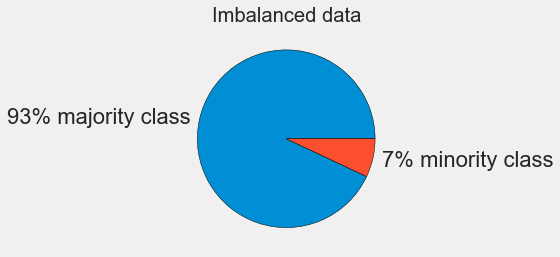

In [122]:
from matplotlib import pyplot as plt
plt.style.use("fivethirtyeight")

slices =[93, 7]
labels =['93% majority class', '7% minority class']

plt.pie(slices, labels=labels, wedgeprops = {'edgecolor': 'black'})
plt.title("Imbalanced data")
plt.tight_layout()
plt.savefig('Imbalaned.png', dpi=300, bbox_inches='tight')
plt.show()

In [123]:
# df_0 = df[df['label4'] == 0]

In [124]:
# df_0 = df_0.sample(n=4302)
# df_1 = df[df['label4'] == 1]
# df = pd.concat([df_0, df_1])

In [8]:
len(df)

64743

In [9]:
x = df.drop(['label4'], 1)
y = df[['label4']]

In [10]:
len(y)

64743

In [11]:
len(x)

64743

In [12]:
x_scaled = copy.deepcopy(x)

scaler = MinMaxScaler(feature_range=(0, 1))
x_scaled['glove_vec300_norm'] = scaler.fit_transform(x_scaled[['glove_vec300_norm']])
x_scaled['tfidf_art'] = scaler.fit_transform(x_scaled[['tfidf_art']])

In [130]:
X= x_scaled
X

,glove_vec300_norm,tfidf_art,negative_conc,positive_conc,weak_subj,strong_subj,hyperbolic_terms,attitude_markers,kill_verbs,bias_lexicon,...,ne_NORP_context,ne_ORDINAL_context,ne_ORG_context,ne_PERCENT_context,ne_PERSON_context,ne_PRODUCT_context,ne_QUANTITY_context,ne_TIME_context,ne_WORK_OF_ART_context,ne_LANGUAGE_context
0,0.000000,0.496227,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.676670,0.268559,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0.490256,0.383311,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0.636148,0.251830,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.555787,0.429021,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66880,0.676962,0.110980,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
66881,0.639719,0.174156,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
66882,0.626597,0.214995,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
66883,0.588417,0.176167,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [131]:
len(X)

64743

In [132]:
len(y)

64743

In [133]:
feature_list = list(x.columns)
len(feature_list)

290

In [134]:
print('Biased words:',round(len(y[y['label4']==1])/len(y)*100,0),'%')
print('Biased words:',round(len(y[y['label4']==0])/len(y)*100,0),'%')

Biased words: 7.0 %
Biased words: 93.0 %


Holdout Validation Approach Train and Test split

In [135]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=4, stratify=y)

In [136]:
y_train['label4'].value_counts()

0    48383
1     3411
Name: label4, dtype: int64

In [137]:
print('Training Features Shape:', X_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', X_test.shape)
print('Testing Labels Shape:', y_test.shape)

Training Features Shape: (51794, 290)
Training Labels Shape: (51794, 1)
Testing Features Shape: (12949, 290)
Testing Labels Shape: (12949, 1)


Logistic Regression Model

In [173]:
import numpy as np
from mlxtend.evaluate import bootstrap_point632_score


def bootstrap_estimate_and_ci(estimator, X, y, scoring_func=None, random_seed=0, 
                              method='.632', alpha=0.05, n_splits=50):
    scores = bootstrap_point632_score(estimator, X, y, scoring_func=scoring_func, 
                                      n_splits=n_splits, random_seed=random_seed, 
                                      method=method)
    estimate = np.mean(scores)
    lower_bound = np.percentile(scores, 100*(alpha/2))
    upper_bound = np.percentile(scores, 100*(1-alpha/2))
    stderr = np.std(scores)
    
    return estimate, lower_bound, upper_bound, stderr


#================#
#    Examples    #
#================#
from sklearn.base import clone
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score, f1_score, precision_score, roc_auc_score, fowlkes_mallows_score

x_axis = []
y_axis = []
ci_low = []
ci_up = []

X = x.to_numpy()
y = y.to_numpy()
y = np.array([x[0] for x in y])

# X, y = make_classification(n_redundant=0)
estimator = LogisticRegression(solver='lbfgs', random_state=42, max_iter=300, verbose=1, C=10.0)

# Calculate a bootstrap estimate for accuracy and a 95% confidence interval
est, low, up, stderr = bootstrap_estimate_and_ci(estimator, X, y)

x_axis.append('Accuracy')
y_axis.append(est)
ci_low.append(low)
ci_up.append(up)

print(f"estimate: {est:.2f}, confidence interval: [{low:.2f}, {up:.2f}], "
      f"standard error: {stderr:.2f}")

# Calculate a bootstrap estimate for recall and a 95% confidence interval
est, low, up, stderr = bootstrap_estimate_and_ci(estimator, X, y, 
                                                 scoring_func=recall_score)
x_axis.append('recall_score')
y_axis.append(est)
ci_low.append(low)
ci_up.append(up)



# Calculate a bootstrap estimate for precision and a 99% confidence interval
est, low, up, stderr = bootstrap_estimate_and_ci(estimator, X, y, 
                                                 scoring_func=precision_score, 
                                                 alpha=0.01)
x_axis.append('prec_score')
y_axis.append(est)
ci_low.append(low)
ci_up.append(up)


# Calculate a bootstrap estimate for f1-score and a 90% confidence interval
est, low, up, stderr = bootstrap_estimate_and_ci(estimator, X, y, 
                                                 scoring_func=f1_score, 
                                                 alpha=0.1)
x_axis.append('f1_score')
y_axis.append(est)
ci_low.append(low)
ci_up.append(up)


# Calculate a bootstrap estimate for Gmean-score and a 90% confidence interval
est, low, up, stderr = bootstrap_estimate_and_ci(logreg, X, y, 
                                                 scoring_func=fowlkes_mallows_score, 
                                                 alpha=0.1)
x_axis.append('Gmean')
y_axis.append(est)
ci_low.append(low)
ci_up.append(up)


print(f"estimate: {est:.2f}, confidence interval: [{low:.2f}, {up:.2f}], "
      f"standard error: {stderr:.2f}")

# Calculate a bootstrap estimate for ROC AUC and a 95% confidence interval
# It's a hack, but it's short and simple.
cloned_estimator = clone(estimator)
cloned_estimator.predict = cloned_estimator.decision_function
est, low, up, stderr = bootstrap_estimate_and_ci(cloned_estimator, X, y, 
                                                 scoring_func=roc_auc_score)
x_axis.append('roc_auc_score')
y_axis.append(est)
ci_low.append(low)
ci_up.append(up)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\lamai\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    9.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\lamai\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as sho

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\lamai\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   11.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\lamai\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as sho

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\lamai\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\lamai\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as sho

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\lamai\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\lamai\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as sho

estimate: 0.93, confidence interval: [0.93, 0.94], standard error: 0.00


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\lamai\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    9.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\lamai\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as sho

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\lamai\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    9.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\lamai\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as sho

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\lamai\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\lamai\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as sho

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\lamai\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\lamai\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as sho

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\lamai\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\lamai\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as sho

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\lamai\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    9.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\lamai\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as sho

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\lamai\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    9.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\lamai\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as sho

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\lamai\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   12.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\lamai\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as sho

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\lamai\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    9.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\lamai\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as sho

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\lamai\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\lamai\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as sho

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\lamai\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   10.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\lamai\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as sho

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\lamai\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   10.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\lamai\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as sho

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\lamai\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\lamai\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as sho

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\lamai\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    9.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\lamai\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as sho

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\lamai\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\lamai\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as sho

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\lamai\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\lamai\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as sho

estimate: 0.93, confidence interval: [0.93, 0.94], standard error: 0.00


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\lamai\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    9.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\lamai\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as sho

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\lamai\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\lamai\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as sho

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\lamai\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    9.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\lamai\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as sho

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\lamai\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   10.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\lamai\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as sho

In [31]:
X.shape

(64743, 290)

In [32]:
x_axis

NameError: name 'x_axis' is not defined

In [176]:
# Mean
y_axis

[0.9339882827261776,
 0.09873941432564823,
 0.5114032853571852,
 0.16536145671894495,
 0.9347036998608875,
 0.5460129361084706]

In [178]:
# CI low
ci_low

[0.9327606346952857,
 0.08845114366330281,
 0.47509383675094996,
 0.15191270267784385,
 0.9336631820171899,
 0.5413599996622898]

In [177]:
# CI up
ci_up

[0.9353462809154316,
 0.11023059013927593,
 0.5458888625566183,
 0.1803065018383716,
 0.935831686360112,
 0.5513100349507621]

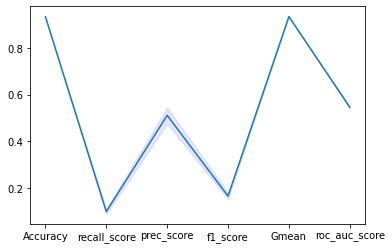

In [180]:
from matplotlib import pyplot as plt
import numpy as np

fig, ax = plt.subplots()
ax.plot(x_axis,y_axis)
ax.fill_between(x_axis, ci_low, ci_up, color='b', alpha=.1)
fig.savefig('bootstrap_estimate_and_ci.png')

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import pickle

# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
logreg = LogisticRegression(solver='lbfgs', random_state=42, max_iter=300, verbose=1, C=10.0)
logreg.fit(X_train, y_train.values.ravel())

# save the model to disk
filename = 'logreg_model.sav'
pickle.dump(logreg, open(filename, 'wb'))

y_pred = logreg.predict(X_test)
# print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(y_test, y_pred)))
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[[12016    80]
 [  780    73]]


C:\Users\shiva\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.6s finished


In [20]:
len(abs(logreg.coef_[0]))

290

In [21]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.99      0.97     12096
           1       0.48      0.09      0.15       853

    accuracy                           0.93     12949
   macro avg       0.71      0.54      0.56     12949
weighted avg       0.91      0.93      0.91     12949



In [204]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.99      0.97     20012
           1       0.56      0.10      0.16      1420

    accuracy                           0.94     21432
   macro avg       0.75      0.55      0.57     21432
weighted avg       0.91      0.94      0.91     21432



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.4s finished


Logistic: f1=0.145 auc=0.304


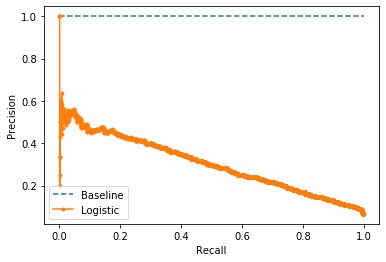

In [35]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from matplotlib import pyplot
import warnings
warnings.filterwarnings('ignore')

logreg.fit(x_train, y_train.values.ravel())
# y_pred = logreg.predict(x_test)
lr_probs = logreg.predict_proba(x_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
# calculate precision and recall for each threshold
lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_probs)
# calculate scores
lr_f1, lr_auc = f1_score(y_test, y_pred), auc(lr_recall, lr_precision)
# summarize scores
print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
Baseline = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0, 1], [Baseline, Baseline], linestyle='--', label='Baseline')
pyplot.plot(lr_recall, lr_precision, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

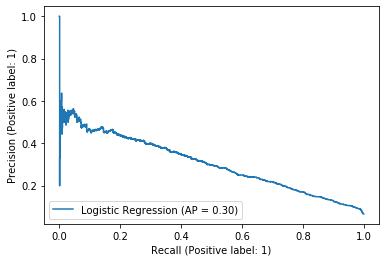

In [36]:
from sklearn.metrics import plot_precision_recall_curve

plot_precision_recall_curve(logreg, x_test, y_test, name='Logistic Regression')

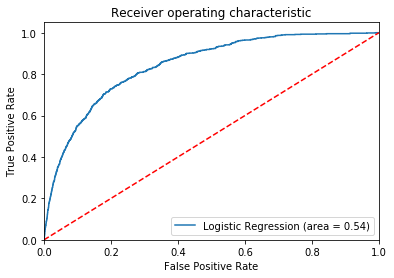

In [22]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

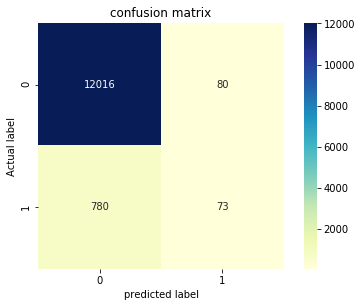

In [50]:
import seaborn as sns

sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap='YlGnBu', fmt='g', square=True)
# ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('predicted label')
plt.savefig('Log_confusion_matrix.pdf', bbox_inches="tight")

In [205]:
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.935143710339679


In [206]:
print('precision:', metrics.precision_score(y_test, y_pred))

precision: 0.5614754098360656


In [207]:
print('recall:', metrics.recall_score(y_test, y_pred))

recall: 0.09647887323943662


In [208]:
logreg.score(x_train,y_train)#training accuracy

0.9339032910461482

In [209]:
logreg.score(x_test, y_test)#test accuracy

0.935143710339679

Support Vector Machine

In [ ]:
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear')

#Train the model using the training sets
clf.fit(x_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

C:\Users\lamai\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [ ]:
# Model Precision
print("Precision:",metrics.precision_score(y_test, y_pred))
# Model Recall
print("Recall:",metrics.recall_score(y_test, y_pred))

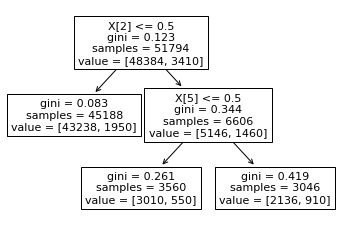

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

clf = DecisionTreeClassifier(max_leaf_nodes=3, random_state=0)
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)


tree.plot_tree(clf)
plt.show()

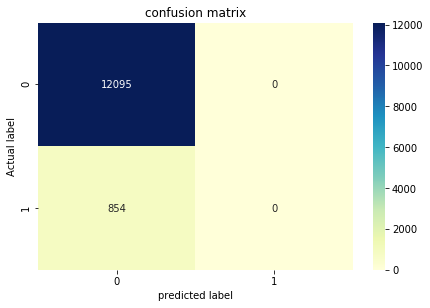

In [30]:
sns.heatmap(pd.DataFrame(cms), annot=True, cmap='YlGnBu', fmt='g')
# ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('predicted label')
plt.savefig('Dec_confusion_matrix')

In [27]:
from sklearn.metrics import confusion_matrix
cms= confusion_matrix(y_test, y_pred)
print(cms)

[[12095     0]
 [  854     0]]


In [52]:
# Model Precision
print("Precision:",metrics.precision_score(y_test, y_pred))
# Model Recall
print("Recall:",metrics.recall_score(y_test, y_pred))
print("F1-score:",metrics.f1_score(y_test, y_pred))

Precision: 0.47058823529411764
Recall: 0.05620608899297424
F1-score: 0.10041841004184102


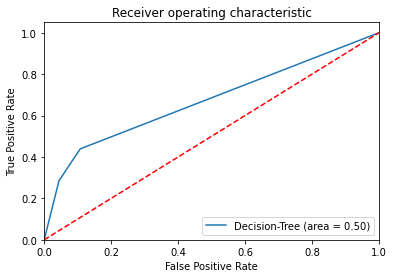

In [46]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
clf_roc_auc = roc_auc_score(y_test, clf.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Decision-Tree (area = %0.2f)' % clf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Dec_ROC')
plt.show()

Random Forest

In [25]:
import numpy as np
from mlxtend.evaluate import bootstrap_point632_score


def bootstrap_estimate_and_ci(estimator, X, y, scoring_func=None, random_seed=0, 
                              method='.632', alpha=0.05, n_splits=50):
    scores = bootstrap_point632_score(estimator, X, y, scoring_func=scoring_func, 
                                      n_splits=n_splits, random_seed=random_seed, 
                                      method=method)
    estimate = np.mean(scores)
    lower_bound = np.percentile(scores, 100*(alpha/2))
    upper_bound = np.percentile(scores, 100*(1-alpha/2))
    stderr = np.std(scores)
    
    return estimate, lower_bound, upper_bound, stderr


#================#
#    Examples    #
#================#
from sklearn.base import clone
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score, f1_score, precision_score, roc_auc_score, fowlkes_mallows_score

x_axis = []
y_axis = []
ci_low = []
ci_up = []

#X = x.to_numpy()
#y = y.to_numpy()
#y = np.array([x[0] for x in y])

# X, y = make_classification(n_redundant=0)
estimator = RandomForestClassifier(n_estimators=20, random_state=42, verbose=1)

# Calculate a bootstrap estimate for accuracy and a 95% confidence interval
est, low, up, stderr = bootstrap_estimate_and_ci(estimator, X, y)

x_axis.append('Accuracy')
y_axis.append(est)
ci_low.append(low)
ci_up.append(up)

print(f"estimate: {est:.2f}, confidence interval: [{low:.2f}, {up:.2f}], "
      f"standard error: {stderr:.2f}")

# Calculate a bootstrap estimate for recall and a 95% confidence interval
est, low, up, stderr = bootstrap_estimate_and_ci(estimator, X, y, 
                                                 scoring_func=recall_score)
x_axis.append('recall_score')
y_axis.append(est)
ci_low.append(low)
ci_up.append(up)



# Calculate a bootstrap estimate for precision and a 99% confidence interval
est, low, up, stderr = bootstrap_estimate_and_ci(estimator, X, y, 
                                                 scoring_func=precision_score, 
                                                 alpha=0.01)
x_axis.append('prec_score')
y_axis.append(est)
ci_low.append(low)
ci_up.append(up)


# Calculate a bootstrap estimate for f1-score and a 90% confidence interval
est, low, up, stderr = bootstrap_estimate_and_ci(estimator, X, y, 
                                                 scoring_func=f1_score, 
                                                 alpha=0.1)
x_axis.append('f1_score')
y_axis.append(est)
ci_low.append(low)
ci_up.append(up)


# Calculate a bootstrap estimate for Gmean-score and a 90% confidence interval
est, low, up, stderr = bootstrap_estimate_and_ci(estimator, X, y, 
                                                 scoring_func=fowlkes_mallows_score, 
                                                 alpha=0.1)
x_axis.append('Gmean')
y_axis.append(est)
ci_low.append(low)
ci_up.append(up)


print(f"estimate: {est:.2f}, confidence interval: [{low:.2f}, {up:.2f}], "
      f"standard error: {stderr:.2f}")

# Calculate a bootstrap estimate for ROC AUC and a 95% confidence interval
# It's a hack, but it's short and simple.
cloned_estimator = clone(estimator)
cloned_estimator.predict = cloned_estimator.predict_proba
est, low, up, stderr = bootstrap_estimate_and_ci(cloned_estimator, X, y, 
                                                 scoring_func=roc_auc_score)
x_axis.append('roc_auc_score')
y_axis.append(est)
ci_low.append(low)
ci_up.append(up)

estimate: 0.96, confidence interval: [0.96, 0.96], standard error: 0.00
estimate: 0.96, confidence interval: [0.96, 0.96], standard error: 0.00


In [26]:
x_axis

['Accuracy',
 'recall_score',
 'prec_score',
 'f1_score',
 'Gmean',
 'roc_auc_score']

In [27]:
y_axis

[0.9578173232247039,
 0.39588241386828704,
 0.7082436346620787,
 0.429246736508796,
 0.9586246770625353,
 0.6968224403055236]

In [28]:
ci_low

[0.9559687732562516,
 0.39023424823592934,
 0.6688445050937599,
 0.4201264442743721,
 0.9574291568621394,
 0.693985448291636]

In [29]:
ci_up

[0.9590561248937937,
 0.40290169309385826,
 0.7783052826371605,
 0.43894517199502436,
 0.959747303871772,
 0.7002455000047888]

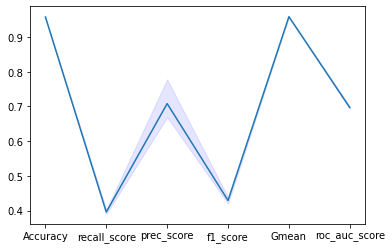

In [30]:
from matplotlib import pyplot as plt
import numpy as np

fig, ax = plt.subplots()
ax.plot(x_axis,y_axis)
ax.fill_between(x_axis, ci_low, ci_up, color='b', alpha=.1)
fig.savefig('bootstrap_estimate_and_ci_Random_Forest.png')

In [48]:
from sklearn.ensemble import RandomForestClassifier
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
# x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.33, random_state=4, stratify=y)
classify = RandomForestClassifier(n_estimators=20, random_state=0)
classify.fit(X_train, y_train.values.ravel())
y_pred = classify.predict(X_test)
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test, y_pred)
print(cm)

[[12041    54]
 [  806    48]]


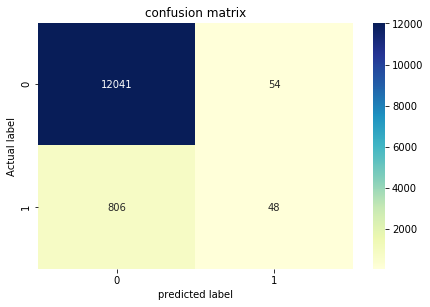

In [49]:
sns.heatmap(pd.DataFrame(cm), annot=True, cmap='YlGnBu', fmt='g')
# ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('predicted label')
plt.savefig('Ran_confusion_matrix')

In [50]:
print(classification_report(y_test, y_pred))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97     12095
           1       0.47      0.06      0.10       854

    accuracy                           0.93     12949
   macro avg       0.70      0.53      0.53     12949
weighted avg       0.91      0.93      0.91     12949

Accuracy: 0.9335856050660283


In [51]:
# Model Precision
print("Precision:",metrics.precision_score(y_test, y_pred))
# Model Recall
print("Recall:",metrics.recall_score(y_test, y_pred))
print("F1-score:",metrics.f1_score(y_test, y_pred))

Precision: 0.47058823529411764
Recall: 0.05620608899297424
F1-score: 0.10041841004184102


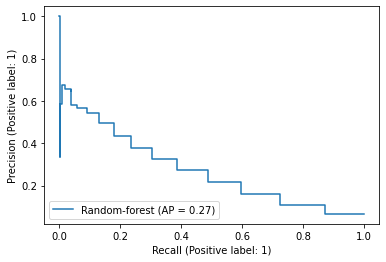

In [238]:
from sklearn.metrics import plot_precision_recall_curve

plot_precision_recall_curve(classify, x_test, y_test, name='Random-forest')

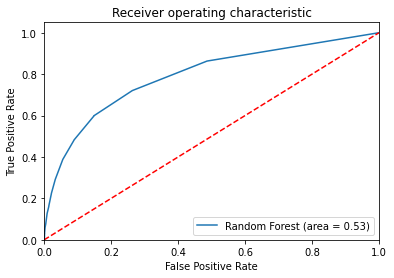

In [47]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
Ran_roc_auc = roc_auc_score(y_test, classify.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, classify.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % Ran_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Ran_ROC')
plt.show()

GaussianNaive_Bayes

In [34]:
import numpy as np
from mlxtend.evaluate import bootstrap_point632_score


def bootstrap_estimate_and_ci(estimator, X, y, scoring_func=None, random_seed=0, 
                              method='.632', alpha=0.05, n_splits=50):
    scores = bootstrap_point632_score(estimator, X, y, scoring_func=scoring_func, 
                                      n_splits=n_splits, random_seed=random_seed, 
                                      method=method)
    estimate = np.mean(scores)
    lower_bound = np.percentile(scores, 100*(alpha/2))
    upper_bound = np.percentile(scores, 100*(1-alpha/2))
    stderr = np.std(scores)
    
    return estimate, lower_bound, upper_bound, stderr


#================#
#    Examples    #
#================#
from sklearn.base import clone
from sklearn.datasets import make_classification
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import recall_score, f1_score, precision_score, roc_auc_score, fowlkes_mallows_score

x_axis = []
y_axis = []
ci_low = []
ci_up = []

#X = x.to_numpy()
#y = y.to_numpy()
#y = np.array([x[0] for x in y])

# X, y = make_classification(n_redundant=0)
estimator = GaussianNB()

# Calculate a bootstrap estimate for accuracy and a 95% confidence interval
est, low, up, stderr = bootstrap_estimate_and_ci(estimator, X, y)

x_axis.append('Accuracy')
y_axis.append(est)
ci_low.append(low)
ci_up.append(up)

print(f"estimate: {est:.2f}, confidence interval: [{low:.2f}, {up:.2f}], "
      f"standard error: {stderr:.2f}")

# Calculate a bootstrap estimate for recall and a 95% confidence interval
est, low, up, stderr = bootstrap_estimate_and_ci(estimator, X, y, 
                                                 scoring_func=recall_score)
x_axis.append('recall_score')
y_axis.append(est)
ci_low.append(low)
ci_up.append(up)



# Calculate a bootstrap estimate for precision and a 99% confidence interval
est, low, up, stderr = bootstrap_estimate_and_ci(estimator, X, y, 
                                                 scoring_func=precision_score, 
                                                 alpha=0.01)
x_axis.append('prec_score')
y_axis.append(est)
ci_low.append(low)
ci_up.append(up)


# Calculate a bootstrap estimate for f1-score and a 90% confidence interval
est, low, up, stderr = bootstrap_estimate_and_ci(estimator, X, y, 
                                                 scoring_func=f1_score, 
                                                 alpha=0.1)
x_axis.append('f1_score')
y_axis.append(est)
ci_low.append(low)
ci_up.append(up)


# Calculate a bootstrap estimate for Gmean-score and a 90% confidence interval
est, low, up, stderr = bootstrap_estimate_and_ci(model, X, y, 
                                                 scoring_func=fowlkes_mallows_score, 
                                                 alpha=0.1)
x_axis.append('Gmean')
y_axis.append(est)
ci_low.append(low)
ci_up.append(up)


print(f"estimate: {est:.2f}, confidence interval: [{low:.2f}, {up:.2f}], "
      f"standard error: {stderr:.2f}")

# Calculate a bootstrap estimate for ROC AUC and a 95% confidence interval
# It's a hack, but it's short and simple.
cloned_estimator = clone(model)
cloned_estimator.predict = cloned_estimator.predict_proba
est, low, up, stderr = bootstrap_estimate_and_ci(cloned_estimator, X, y, 
                                                 scoring_func=roc_auc_score)
x_axis.append('roc_auc_score')
y_axis.append(est)
ci_low.append(low)
ci_up.append(up)

estimate: 0.22, confidence interval: [0.18, 0.26], standard error: 0.02
estimate: 0.79, confidence interval: [0.76, 0.82], standard error: 0.02


In [36]:
x_axis

['Accuracy',
 'recall_score',
 'prec_score',
 'f1_score',
 'Gmean',
 'roc_auc_score']

In [37]:
y_axis

[0.21516929961185405,
 0.9766136680014086,
 0.07638021299229775,
 0.1416711109984262,
 0.7944801396281962,
 0.5688608142196535]

In [38]:
ci_low

[0.17874695061662432,
 0.9672468806294132,
 0.07288295502126643,
 0.13755306213806567,
 0.7607772256604565,
 0.5526504558870043]

In [39]:
ci_up

[0.2639453426202755,
 0.9848401768482707,
 0.0804211082271769,
 0.14831206691014953,
 0.8192687608084489,
 0.5924078249360923]

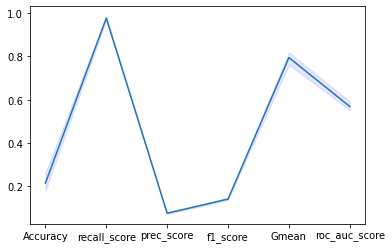

In [35]:
from matplotlib import pyplot as plt
import numpy as np

fig, ax = plt.subplots()
ax.plot(x_axis,y_axis)
ax.fill_between(x_axis, ci_low, ci_up, color='b', alpha=.1)
fig.savefig('bootstrap_estimate_and_ci_GaussianNB.png')

In [44]:
from sklearn.naive_bayes import GaussianNB

model= GaussianNB()
model.fit(X_train, y_train.values.ravel())
y_pred= model.predict(X_test)
# print('Accuracy:',metrics.accuracy_score(y_test, y_pred))

from sklearn.metrics import confusion_matrix
cm1= confusion_matrix(y_test, y_pred)
print(cm1)

[[ 1855 10240]
 [   20   834]]


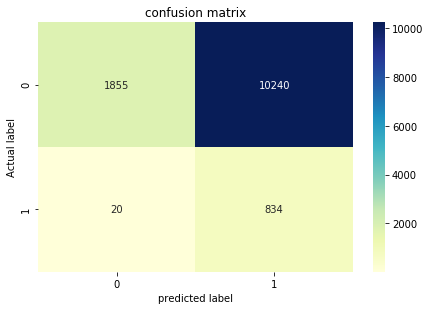

In [45]:
sns.heatmap(pd.DataFrame(cm1), annot=True, cmap='YlGnBu', fmt='g')
# ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('predicted label')
plt.savefig('GNB_confusion_matrix')

In [46]:
print(classification_report(y_test, y_pred))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.15      0.27     12095
           1       0.08      0.98      0.14       854

    accuracy                           0.21     12949
   macro avg       0.53      0.56      0.20     12949
weighted avg       0.93      0.21      0.26     12949

Accuracy: 0.207660823229593


In [47]:
# Model Precision
print("Precision:",metrics.precision_score(y_test, y_pred))
# Model Recall
print("Recall:",metrics.recall_score(y_test, y_pred))
print("F1-score:",metrics.f1_score(y_test, y_pred))

Precision: 0.0753115405454217
Recall: 0.9765807962529274
F1-score: 0.1398390342052314


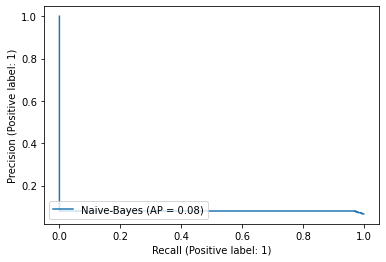

In [243]:
from sklearn.metrics import plot_precision_recall_curve

plot_precision_recall_curve(model, x_test, y_test, name='Naive-Bayes')

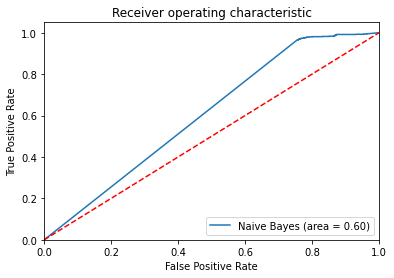

In [55]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
GNB_roc_auc = roc_auc_score(y_test, model.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Naive Bayes (area = %0.2f)' % GNB_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('GNB_ROC')
plt.show()

Complement Naive_Bayes

In [45]:
import numpy as np
from mlxtend.evaluate import bootstrap_point632_score


def bootstrap_estimate_and_ci(estimator, X, y, scoring_func=None, random_seed=0, 
                              method='.632', alpha=0.05, n_splits=50):
    scores = bootstrap_point632_score(estimator, X, y, scoring_func=scoring_func, 
                                      n_splits=n_splits, random_seed=random_seed, 
                                      method=method)
    estimate = np.mean(scores)
    lower_bound = np.percentile(scores, 100*(alpha/2))
    upper_bound = np.percentile(scores, 100*(1-alpha/2))
    stderr = np.std(scores)
    
    return estimate, lower_bound, upper_bound, stderr


#================#
#    Examples    #
#================#
from sklearn.base import clone
from sklearn.datasets import make_classification
from sklearn.naive_bayes import ComplementNB
from sklearn.metrics import recall_score, f1_score, precision_score, roc_auc_score, fowlkes_mallows_score

x_axis = []
y_axis = []
ci_low = []
ci_up = []

#X = x.to_numpy()
#y = y.to_numpy()
#y = np.array([x[0] for x in y])

# X, y = make_classification(n_redundant=0)
estimator = ComplementNB()

# Calculate a bootstrap estimate for accuracy and a 95% confidence interval
est, low, up, stderr = bootstrap_estimate_and_ci(estimator, X, y)

x_axis.append('Accuracy')
y_axis.append(est)
ci_low.append(low)
ci_up.append(up)

print(f"estimate: {est:.2f}, confidence interval: [{low:.2f}, {up:.2f}], "
      f"standard error: {stderr:.2f}")

# Calculate a bootstrap estimate for recall and a 95% confidence interval
est, low, up, stderr = bootstrap_estimate_and_ci(estimator, X, y, 
                                                 scoring_func=recall_score)
x_axis.append('recall_score')
y_axis.append(est)
ci_low.append(low)
ci_up.append(up)



# Calculate a bootstrap estimate for precision and a 99% confidence interval
est, low, up, stderr = bootstrap_estimate_and_ci(estimator, X, y, 
                                                 scoring_func=precision_score, 
                                                 alpha=0.01)
x_axis.append('prec_score')
y_axis.append(est)
ci_low.append(low)
ci_up.append(up)


# Calculate a bootstrap estimate for f1-score and a 90% confidence interval
est, low, up, stderr = bootstrap_estimate_and_ci(estimator, X, y, 
                                                 scoring_func=f1_score, 
                                                 alpha=0.1)
x_axis.append('f1_score')
y_axis.append(est)
ci_low.append(low)
ci_up.append(up)


# Calculate a bootstrap estimate for Gmean-score and a 90% confidence interval
est, low, up, stderr = bootstrap_estimate_and_ci(estimator, X, y, 
                                                 scoring_func=fowlkes_mallows_score, 
                                                 alpha=0.1)
x_axis.append('Gmean')
y_axis.append(est)
ci_low.append(low)
ci_up.append(up)


print(f"estimate: {est:.2f}, confidence interval: [{low:.2f}, {up:.2f}], "
      f"standard error: {stderr:.2f}")

# Calculate a bootstrap estimate for ROC AUC and a 95% confidence interval
# It's a hack, but it's short and simple.
cloned_estimator = clone(CNB)
cloned_estimator.predict = cloned_estimator.predict_proba
est, low, up, stderr = bootstrap_estimate_and_ci(cloned_estimator, X, y, 
                                                 scoring_func=roc_auc_score)
x_axis.append('roc_auc_score')
y_axis.append(est)
ci_low.append(low)
ci_up.append(up)

estimate: 0.73, confidence interval: [0.72, 0.73], standard error: 0.00
estimate: 0.74, confidence interval: [0.74, 0.75], standard error: 0.00


In [47]:
x_axis

['Accuracy',
 'recall_score',
 'prec_score',
 'f1_score',
 'Gmean',
 'roc_auc_score']

In [48]:
y_axis

[0.7264809628283954,
 0.7391909981901734,
 0.16053943169333337,
 0.26377239282619347,
 0.7423727298876979,
 0.7323846861920308]

In [49]:
ci_low

[0.7219434675712415,
 0.726723384893569,
 0.1568105328941139,
 0.25936367736892957,
 0.7392989545548214,
 0.7266649981438296]

In [50]:
ci_up

[0.7312030759231957,
 0.7503458521023831,
 0.16497790552410319,
 0.26705588124740676,
 0.7455033132916792,
 0.7364968826665269]

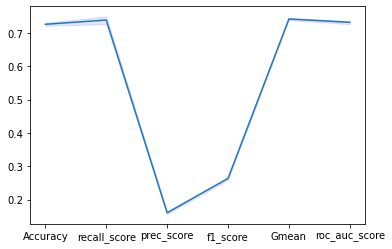

In [51]:
from matplotlib import pyplot as plt
import numpy as np

fig, ax = plt.subplots()
ax.plot(x_axis,y_axis)
ax.fill_between(x_axis, ci_low, ci_up, color='b', alpha=.1)
fig.savefig('bootstrap_estimate_and_ci_CNB.png')

In [40]:
from sklearn.naive_bayes import ComplementNB
CNB = ComplementNB(alpha=1.0, fit_prior=True, class_prior=None, norm=False)
CNB.fit(X_train, y_train.values.ravel())
y_pred= CNB.predict(X_test)
from sklearn.metrics import confusion_matrix
cm2= confusion_matrix(y_test, y_pred)
print(cm2)

[[8788 3307]
 [ 222  632]]


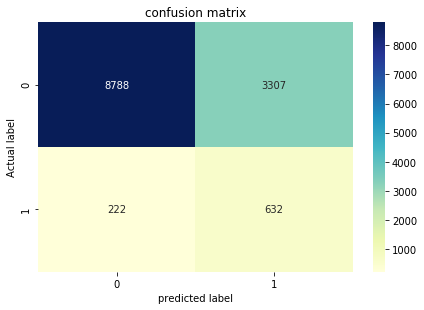

In [41]:
import seaborn as sns
sns.heatmap(pd.DataFrame(cm2), annot=True, cmap='YlGnBu', fmt='g')
# ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('predicted label')
plt.savefig('CNB_confusion_matrix')

In [42]:
print(classification_report(y_test, y_pred))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.73      0.83     12095
           1       0.16      0.74      0.26       854

    accuracy                           0.73     12949
   macro avg       0.57      0.73      0.55     12949
weighted avg       0.92      0.73      0.80     12949

Accuracy: 0.7274693026488532


In [43]:
# Model Precision
print("Precision:",metrics.precision_score(y_test, y_pred))
# Model Recall
print("Recall:",metrics.recall_score(y_test, y_pred))
#Model F1-score
print("F1-score:",metrics.f1_score(y_test, y_pred))

Precision: 0.16044681391216045
Recall: 0.7400468384074942
F1-score: 0.2637179219695389


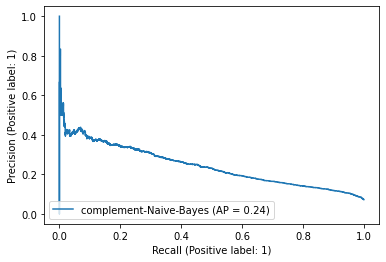

In [83]:
from sklearn.metrics import plot_precision_recall_curve

plot_precision_recall_curve(CNB, x_test, y_test, name='complement-Naive-Bayes')

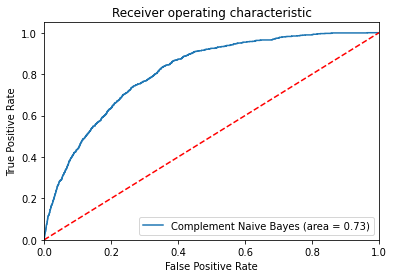

In [70]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
CNB_roc_auc = roc_auc_score(y_test, CNB.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, CNB.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Complement Naive Bayes (area = %0.2f)' % CNB_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('CNB_ROC')
plt.show()

KNN clasifier

In [54]:
import numpy as np
from mlxtend.evaluate import bootstrap_point632_score


def bootstrap_estimate_and_ci(estimator, X, y, scoring_func=None, random_seed=0, 
                              method='.632', alpha=0.05, n_splits=50):
    scores = bootstrap_point632_score(estimator, X, y, scoring_func=scoring_func, 
                                      n_splits=n_splits, random_seed=random_seed, 
                                      method=method)
    estimate = np.mean(scores)
    lower_bound = np.percentile(scores, 100*(alpha/2))
    upper_bound = np.percentile(scores, 100*(1-alpha/2))
    stderr = np.std(scores)
    
    return estimate, lower_bound, upper_bound, stderr


#================#
#    Examples    #
#================#
from sklearn.base import clone
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import recall_score, f1_score, precision_score, roc_auc_score, fowlkes_mallows_score

x_axis = []
y_axis = []
ci_low = []
ci_up = []

#X = x.to_numpy()
#y = y.to_numpy()
#y = np.array([x[0] for x in y])

# X, y = make_classification(n_redundant=0)
estimator = KNeighborsClassifier()

# Calculate a bootstrap estimate for accuracy and a 95% confidence interval
est, low, up, stderr = bootstrap_estimate_and_ci(knn, X, y)

x_axis.append('Accuracy')
y_axis.append(est)
ci_low.append(low)
ci_up.append(up)

print(f"estimate: {est:.2f}, confidence interval: [{low:.2f}, {up:.2f}], "
      f"standard error: {stderr:.2f}")

# Calculate a bootstrap estimate for recall and a 95% confidence interval
est, low, up, stderr = bootstrap_estimate_and_ci(estimator, X, y, 
                                                 scoring_func=recall_score)
x_axis.append('recall_score')
y_axis.append(est)
ci_low.append(low)
ci_up.append(up)



# Calculate a bootstrap estimate for precision and a 99% confidence interval
est, low, up, stderr = bootstrap_estimate_and_ci(estimator, X, y, 
                                                 scoring_func=precision_score, 
                                                 alpha=0.01)
x_axis.append('prec_score')
y_axis.append(est)
ci_low.append(low)
ci_up.append(up)


# Calculate a bootstrap estimate for f1-score and a 90% confidence interval
est, low, up, stderr = bootstrap_estimate_and_ci(estimator, X, y, 
                                                 scoring_func=f1_score, 
                                                 alpha=0.1)
x_axis.append('f1_score')
y_axis.append(est)
ci_low.append(low)
ci_up.append(up)


# Calculate a bootstrap estimate for Gmean-score and a 90% confidence interval
est, low, up, stderr = bootstrap_estimate_and_ci(estimator, X, y, 
                                                 scoring_func=fowlkes_mallows_score, 
                                                 alpha=0.1)
x_axis.append('Gmean')
y_axis.append(est)
ci_low.append(low)
ci_up.append(up)


print(f"estimate: {est:.2f}, confidence interval: [{low:.2f}, {up:.2f}], "
      f"standard error: {stderr:.2f}")

# Calculate a bootstrap estimate for ROC AUC and a 95% confidence interval
# It's a hack, but it's short and simple.
cloned_estimator = clone(estimator)
cloned_estimator.predict = cloned_estimator.predict_proba
est, low, up, stderr = bootstrap_estimate_and_ci(cloned_estimator, X, y, 
                                                 scoring_func=roc_auc_score)
x_axis.append('roc_auc_score')
y_axis.append(est)
ci_low.append(low)
ci_up.append(up)

KeyboardInterrupt: 

In [53]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(x_train, y_train.values.ravel())
y_pred= knn.predict(x_test)
from sklearn.metrics import confusion_matrix
confusion= confusion_matrix(y_test, y_pred)
print(confusion)

[[12029   100]
 [  796    64]]


Text(0.5, 15.0, 'predicted label')

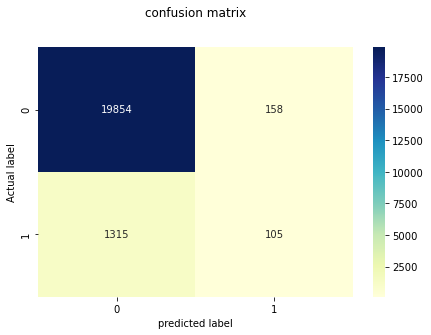

In [250]:
sns.heatmap(pd.DataFrame(confusion), annot=True, cmap='YlGnBu', fmt='g')
# ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('predicted label')

In [251]:
print(classification_report(y_test, y_pred))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96     20012
           1       0.40      0.07      0.12      1420

    accuracy                           0.93     21432
   macro avg       0.67      0.53      0.54     21432
weighted avg       0.90      0.93      0.91     21432

Accuracy: 0.9312709966405375


In [252]:
# Model Precision
print("Precision:",metrics.precision_score(y_test, y_pred))
# Model Recall
print("Recall:",metrics.recall_score(y_test, y_pred))
#Model F1-score
print("F1-score:",metrics.f1_score(y_test, y_pred))

Precision: 0.39923954372623577
Recall: 0.07394366197183098
F1-score: 0.12477718360071301


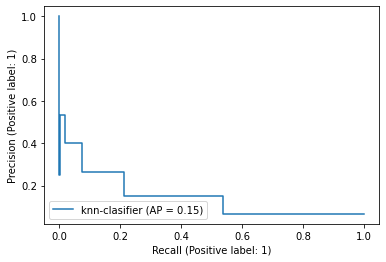

In [254]:
from sklearn.metrics import plot_precision_recall_curve

plot_precision_recall_curve(knn, x_test, y_test, name='knn-clasifier')

Decision Tree using stratified cross_validation

In [58]:
import numpy as np
from mlxtend.evaluate import bootstrap_point632_score


def bootstrap_estimate_and_ci(estimator, X, y, scoring_func=None, random_seed=0, 
                              method='.632', alpha=0.05, n_splits=50):
    scores = bootstrap_point632_score(estimator, X, y, scoring_func=scoring_func, 
                                      n_splits=n_splits, random_seed=random_seed, 
                                      method=method)
    estimate = np.mean(scores)
    lower_bound = np.percentile(scores, 100*(alpha/2))
    upper_bound = np.percentile(scores, 100*(1-alpha/2))
    stderr = np.std(scores)
    
    return estimate, lower_bound, upper_bound, stderr


#================#
#    Examples    #
#================#
from sklearn.base import clone
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import recall_score, f1_score, precision_score, roc_auc_score, fowlkes_mallows_score

x_axis = []
y_axis = []
ci_low = []
ci_up = []

#X = x.to_numpy()
#y = y.to_numpy()
#y = np.array([x[0] for x in y])

# X, y = make_classification(n_redundant=0)
estimator = DecisionTreeClassifier()

# Calculate a bootstrap estimate for accuracy and a 95% confidence interval
est, low, up, stderr = bootstrap_estimate_and_ci(estimator, X, y)

x_axis.append('Accuracy')
y_axis.append(est)
ci_low.append(low)
ci_up.append(up)

print(f"estimate: {est:.2f}, confidence interval: [{low:.2f}, {up:.2f}], "
      f"standard error: {stderr:.2f}")

# Calculate a bootstrap estimate for recall and a 95% confidence interval
est, low, up, stderr = bootstrap_estimate_and_ci(estimator, X, y, 
                                                 scoring_func=recall_score)
x_axis.append('recall_score')
y_axis.append(est)
ci_low.append(low)
ci_up.append(up)



# Calculate a bootstrap estimate for precision and a 99% confidence interval
est, low, up, stderr = bootstrap_estimate_and_ci(estimator, X, y, 
                                                 scoring_func=precision_score, 
                                                 alpha=0.01)
x_axis.append('prec_score')
y_axis.append(est)
ci_low.append(low)
ci_up.append(up)


# Calculate a bootstrap estimate for f1-score and a 90% confidence interval
est, low, up, stderr = bootstrap_estimate_and_ci(estimator, X, y, 
                                                 scoring_func=f1_score, 
                                                 alpha=0.1)
x_axis.append('f1_score')
y_axis.append(est)
ci_low.append(low)
ci_up.append(up)


# Calculate a bootstrap estimate for Gmean-score and a 90% confidence interval
est, low, up, stderr = bootstrap_estimate_and_ci(estimator, X, y, 
                                                 scoring_func=fowlkes_mallows_score, 
                                                 alpha=0.1)
x_axis.append('Gmean')
y_axis.append(est)
ci_low.append(low)
ci_up.append(up)


print(f"estimate: {est:.2f}, confidence interval: [{low:.2f}, {up:.2f}], "
      f"standard error: {stderr:.2f}")

# Calculate a bootstrap estimate for ROC AUC and a 95% confidence interval
# It's a hack, but it's short and simple.
cloned_estimator = clone(estimator)
cloned_estimator.predict = cloned_estimator.predict_proba
est, low, up, stderr = bootstrap_estimate_and_ci(cloned_estimator, X, y, 
                                                 scoring_func=roc_auc_score)
x_axis.append('roc_auc_score')
y_axis.append(est)
ci_low.append(low)
ci_up.append(up)

estimate: 0.93, confidence interval: [0.93, 0.94], standard error: 0.00
estimate: 0.93, confidence interval: [0.93, 0.93], standard error: 0.00


In [60]:
x_axis

['Accuracy',
 'recall_score',
 'prec_score',
 'f1_score',
 'Gmean',
 'roc_auc_score']

In [61]:
y_axis

[0.9338786827671502,
 0.5231731427362736,
 0.5123586930031748,
 0.5179640191364061,
 0.9319591384141854,
 0.7425151945762836]

In [62]:
ci_low

[0.9317665898359766,
 0.5122075263377905,
 0.499552401775161,
 0.5080386025172448,
 0.9307012367063701,
 0.7348533040724763]

In [63]:
ci_up

[0.9363481201737116,
 0.5349871793074734,
 0.5263046012481288,
 0.527456934445228,
 0.9337098250079596,
 0.7495841098547131]

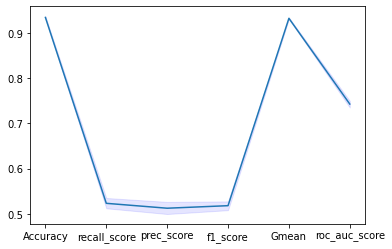

In [59]:
from matplotlib import pyplot as plt
import numpy as np

fig, ax = plt.subplots()
ax.plot(x_axis,y_axis)
ax.fill_between(x_axis, ci_low, ci_up, color='b', alpha=.1)
fig.savefig('bootstrap_estimate_and_ci_Decision Tree using stratified cross_validation.png')

In [56]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import recall_score, f1_score, precision_score, roc_auc_score
skfold=StratifiedKFold(n_splits=5)
model=DecisionTreeClassifier()
scores=cross_val_score(model,x_scaled,y,cv=skfold)
print(np.mean(scores))

0.8950002806809911


In [57]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [58]:
y_pred= model.predict(X_test)
from sklearn.metrics import confusion_matrix
fusion= confusion_matrix(y_test, y_pred)
print(fusion)
#print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

[[11405   690]
 [  639   215]]


In [59]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))
#print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.94      0.94     12095
           1       0.24      0.25      0.24       854

    accuracy                           0.90     12949
   macro avg       0.59      0.60      0.59     12949
weighted avg       0.90      0.90      0.90     12949



In [60]:
# Model Precision
print("Precision:",metrics.precision_score(y_test, y_pred))
# Model Recall
print("Recall:",metrics.recall_score(y_test, y_pred))
#Model F1-score
print("F1-score:",metrics.f1_score(y_test, y_pred))

Precision: 0.23756906077348067
Recall: 0.25175644028103045
F1-score: 0.24445707788516202


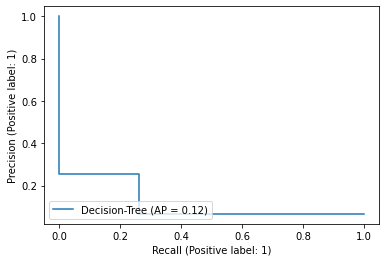

In [74]:
from sklearn.metrics import plot_precision_recall_curve

plot_precision_recall_curve(model, x_test, y_test, name='Decision-Tree')

XGBoost classifier

In [139]:
import numpy as np
from mlxtend.evaluate import bootstrap_point632_score


def bootstrap_estimate_and_ci(estimator, X, y, scoring_func=None, random_seed=0, 
                              method='.632', alpha=0.05, n_splits=50):
    scores = bootstrap_point632_score(estimator, X, y, scoring_func=scoring_func, 
                                      n_splits=n_splits, random_seed=random_seed, 
                                      method=method)
    estimate = np.mean(scores)
    lower_bound = np.percentile(scores, 100*(alpha/2))
    upper_bound = np.percentile(scores, 100*(1-alpha/2))
    stderr = np.std(scores)
    
    return estimate, lower_bound, upper_bound, stderr


#================#
#    Examples    #
#================#
from sklearn.base import clone
from sklearn.datasets import make_classification
from xgboost import XGBClassifier
from sklearn.metrics import recall_score, f1_score, precision_score, roc_auc_score, fowlkes_mallows_score

x_axis = []
y_axis = []
ci_low = []
ci_up = []

X = x.to_numpy()
y = y.to_numpy()
y = np.array([x[0] for x in y])

# X, y = make_classification(n_redundant=0)
estimator = XGBClassifier()

# Calculate a bootstrap estimate for accuracy and a 95% confidence interval
est, low, up, stderr = bootstrap_estimate_and_ci(estimator, X, y)

x_axis.append('Accuracy')
y_axis.append(est)
ci_low.append(low)
ci_up.append(up)

print(f"estimate: {est:.2f}, confidence interval: [{low:.2f}, {up:.2f}], "
      f"standard error: {stderr:.2f}")

# Calculate a bootstrap estimate for recall and a 95% confidence interval
est, low, up, stderr = bootstrap_estimate_and_ci(estimator, X, y, 
                                                 scoring_func=recall_score)
x_axis.append('recall_score')
y_axis.append(est)
ci_low.append(low)
ci_up.append(up)



# Calculate a bootstrap estimate for precision and a 99% confidence interval
est, low, up, stderr = bootstrap_estimate_and_ci(estimator, X, y, 
                                                 scoring_func=precision_score, 
                                                 alpha=0.01)
x_axis.append('prec_score')
y_axis.append(est)
ci_low.append(low)
ci_up.append(up)


# Calculate a bootstrap estimate for f1-score and a 90% confidence interval
est, low, up, stderr = bootstrap_estimate_and_ci(estimator, X, y, 
                                                 scoring_func=f1_score, 
                                                 alpha=0.1)
x_axis.append('f1_score')
y_axis.append(est)
ci_low.append(low)
ci_up.append(up)


# Calculate a bootstrap estimate for Gmean-score and a 90% confidence interval
est, low, up, stderr = bootstrap_estimate_and_ci(estimator, X, y, 
                                                 scoring_func=fowlkes_mallows_score, 
                                                 alpha=0.1)
x_axis.append('Gmean')
y_axis.append(est)
ci_low.append(low)
ci_up.append(up)


print(f"estimate: {est:.2f}, confidence interval: [{low:.2f}, {up:.2f}], "
      f"standard error: {stderr:.2f}")

# Calculate a bootstrap estimate for ROC AUC and a 95% confidence interval
# It's a hack, but it's short and simple.
cloned_estimator = clone(estimator)
cloned_estimator.predict = cloned_estimator.predict_proba
est, low, up, stderr = bootstrap_estimate_and_ci(cloned_estimator, X, y, 
                                                 scoring_func=roc_auc_score)
x_axis.append('roc_auc_score')
y_axis.append(est)
ci_low.append(low)
ci_up.append(up)


KeyboardInterrupt: 

In [138]:
from xgboost import XGBClassifier
model = XGBClassifier()

# fit the model with the training data
model.fit(X_train,y_train.values.ravel())
# model.save_model("xgboost_tuned_weighted.model")

# predict the target on the train dataset
y_pred = model.predict(X_test) 

# Accuray Score on train dataset
model.score(X_train,y_train)

0.9362860562999575

In [86]:
from sklearn.metrics import confusion_matrix
cnf= confusion_matrix(y_test, y_pred)
print(cnf)

[[12049    47]
 [  798    55]]


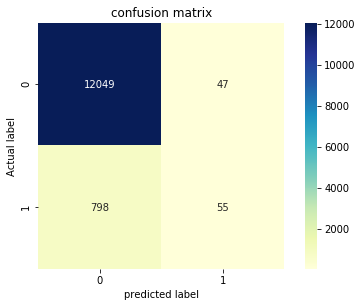

In [48]:
import seaborn as sns
sns.heatmap(pd.DataFrame(cnf), annot=True, cmap='YlGnBu', fmt='g', square=True, )
# ax1 = sns.heatmap(pd.DataFrame(cnf), cbar=0, cmap="YlGnBu",linewidths=2,vmax=3000, vmin=0, square=True)
# ax1.xaxis.set_label_position('top')
# width = 10
# height = 5
plt.tight_layout()
plt.title('confusion matrix')
plt.ylabel('predicted label')
plt.xlabel('Actual label')
#ax1.set_ylim([0,2])
plt.savefig("XG.pdf", bbox_inches="tight")
plt.show()

In [68]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))
#print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97     12095
           1       0.57      0.07      0.13       854

    accuracy                           0.94     12949
   macro avg       0.75      0.53      0.55     12949
weighted avg       0.91      0.94      0.91     12949



In [69]:
# Accuracy Score on test dataset
model.score(x_test,y_test)

0.9342034133909954

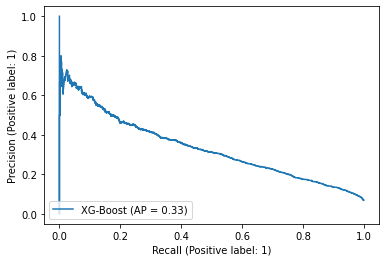

In [56]:
from sklearn.metrics import plot_precision_recall_curve

plot_precision_recall_curve(model, x_test, y_test, name='XG-Boost')

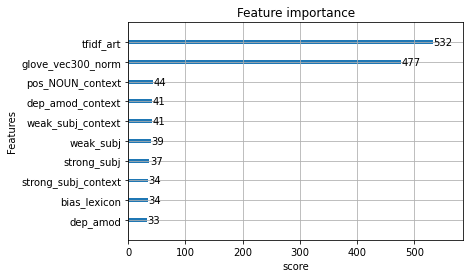

In [48]:
import xgboost
xgboost.plot_importance(model, ax=None, height=0.2, xlim=None,
                    ylim=None, title='Feature importance',
                    xlabel='score', ylabel='Features',
                    importance_type='weight', max_num_features=10,
                    grid=True)
plt.show()

In [65]:
# Model Precision
print("Precision:",metrics.precision_score(y_test, y_pred))
# Model Recall
print("Recall:",metrics.recall_score(y_test, y_pred))
#Model F1-score
print("F1-score:",metrics.f1_score(y_test, y_pred))

Precision: 0.5688073394495413
Recall: 0.07259953161592506
F1-score: 0.12876427829698858


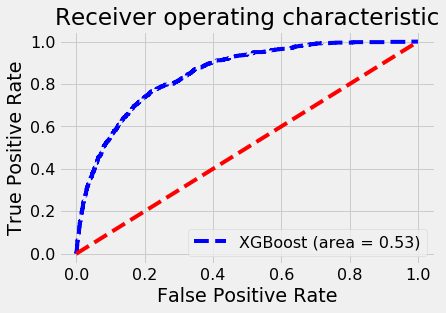

In [35]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
XGB_roc_auc = roc_auc_score(y_test, model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, "b--", label='XGBoost (area = %0.2f)' % XGB_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('XGB_ROC')
plt.show()

In [25]:
y_test

,label4
20271,0
24457,0
16972,0
8113,0
5038,0
...,...
27755,0
20228,0
11767,0
53869,0


No handles with labels found to put in legend.


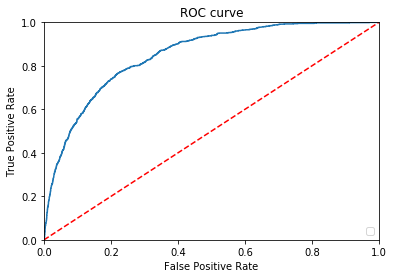

In [96]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
#cf_matrix = metrics.confusion_matrix(test_labels,baseline2)
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
xg_roc_auc = roc_auc_score(y_test, model.predict(X_test))
plt.figure()
plt.plot(fpr, tpr, xg_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
#plt.savefig('XGB_ROC')
plt.show()

In [68]:
scale_pos_weight = len(y_train[y_train['label4']==0])/len(y_train[y_train['label4']==1])
scale_pos_weight

14.184403400762239

In [97]:
# matrix for XGBoost
feature_names = list(x.columns)
train = xgboost.DMatrix(X_train, label=y_train, feature_names=feature_names)
test = xgboost.DMatrix(X_test, label=y_test, feature_names=feature_names)

Hyper-parameter optimization using RandomizedsearchCV

In [57]:
params ={
  "learning_rate"    : [0.05, 0.10, 0.20, 0.25, 0.30 ],
  "max_depth"        : [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
  "min_child_weight" : [1, 3, 5, 7, 9],
  "gamma"            : [0.0, 0.4, 0.5, 0.7, 0.9],
  "colsample_bytree" : [0.3, 0.4, 0.5, 0.7, 0.9]
  'objective':"binary:logistic"
}

In [63]:
cls = xgboost.XGBClassifier()

In [64]:
from sklearn.model_selection import RandomizedSearchCV

rs = RandomizedSearchCV(cls, param_distributions=params, cv=5, n_iter=5, scoring='roc_auc', n_jobs =-1, verbose=3)

In [65]:
rs.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


C:\Users\shiva\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


RandomizedSearchCV(cv=5, estimator=XGBClassifier(), n_iter=5, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5, 0.7,
                                                             0.9],
                                        'gamma': [0.0, 0.4, 0.5, 0.7, 0.9],
                                        'learning_rate': [0.05, 0.1, 0.2, 0.25,
                                                          0.3],
                                        'max_depth': [3, 4, 5, 6, 7, 8, 9, 10,
                                                      11, 12, 13, 14, 15],
                                        'min_child_weight': [1, 3, 5, 7, 9]},
                   scoring='roc_auc', verbose=3)

In [66]:
rs.best_estimator_

XGBClassifier(colsample_bytree=0.4, gamma=0.4, max_depth=14)

In [67]:
rs.best_params_

{'min_child_weight': 1,
 'max_depth': 14,
 'learning_rate': 0.1,
 'gamma': 0.4,
 'colsample_bytree': 0.4}

In [69]:
cls = xgboost.XGBClassifier(colsample_bytree=0.4, gamma=0.4, max_depth=14, objective="binary:logistic", min_child_weight= 1, learning_rate = 0.1, seed = 0, booster = 'gbtree', scale_pos_weight = 14.184403400762239, n_estimators = 100)

In [71]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(cls, X_train, y_train, cv=10)

C:\Users\shiva\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\shiva\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\shiva\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\shiva\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

In [72]:
score

array([0.90637066, 0.89942085, 0.9019305 , 0.8957529 , 0.89109867,
       0.89167793, 0.89940143, 0.89573277, 0.9059664 , 0.89843599])

In [73]:
score.mean()

0.898578809134901

In [114]:
model.save_model("xgboost_tuned_weighted.model")
model = xgboost.Booster()
#xgboost_tuned_weighted.save_model("xgboost_tuned_weighted.model")
model.load_model("xgboost_tuned_weighted.model")

In [103]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97     12096
           1       0.54      0.06      0.12       853

    accuracy                           0.93     12949
   macro avg       0.74      0.53      0.54     12949
weighted avg       0.91      0.93      0.91     12949



In [104]:
xgboost_tuned_weighted_predt = np.where(model.predict(test) > 0.5, 1, 0)
print('Performance of xgboost_tuned_weighted, test:')
print('F1:', round(metrics.f1_score(test.get_label(),xgboost_tuned_weighted_predt),2))
print('Precision:', round(metrics.precision_score(test.get_label(), xgboost_tuned_weighted_predt),2))
print('Recall:', round(metrics.recall_score(test.get_label(), xgboost_tuned_weighted_predt),2))
print('AUC:', round(metrics.roc_auc_score(test.get_label(), xgboost_tuned_weighted_predt),2))
print('Accuracy:', round(metrics.accuracy_score(test.get_label(), xgboost_tuned_weighted_predt),2))
print('Confusion matrix:\n', 
      metrics.confusion_matrix(test.get_label(), xgboost_tuned_weighted_predt).transpose())

Performance of xgboost_tuned_weighted, test:
F1: 0.12
Precision: 0.54
Recall: 0.06
AUC: 0.53
Accuracy: 0.93
Confusion matrix:
 [[12049   798]
 [   47    55]]


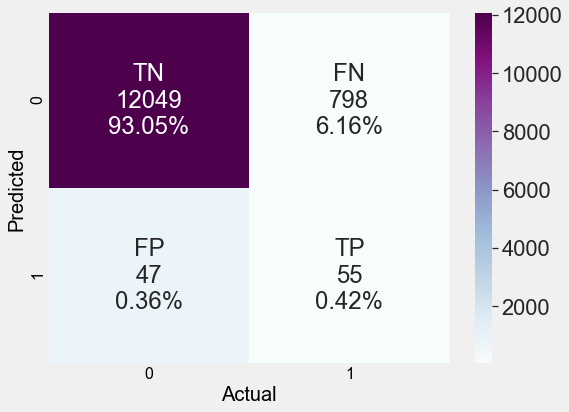

In [106]:
import seaborn as sns
cf_matrix = metrics.confusion_matrix(test.get_label(), xgboost_tuned_weighted_predt)
TN = cf_matrix[0][0]
FN = cf_matrix[1][0]
TP = cf_matrix[1][1]
FP = cf_matrix[0][1]
fl = [TN, FN, FP, TP]
fig, ax = plt.subplots(figsize=(8,6))

sns.set(font_scale=2)
group_names = ['TN','FN','FP','TP']
group_counts = ["{0:0.0f}".format(value) for value in fl]
group_percentages = ["{0:.2%}".format(value) for value in
                     fl/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cf_matrix, annot=labels, fmt='', cmap="BuPu")
plt.ylabel('Predicted', fontsize=20)
plt.xlabel('Actual', fontsize=20)
ax.set_ylim([0,2])
ax.invert_yaxis()

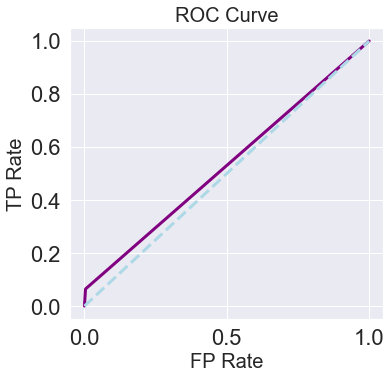

In [107]:
plt.rcParams['font.size'] = 16
plt.subplots(1, 1, figsize=(5,5))

rand_probs = [0 for _ in range(len(test.get_label()))]
rand_fpr, rand_tpr, thresholds = metrics.roc_curve(test.get_label(), rand_probs)

fpr, tpr, thresholds = metrics.roc_curve(test.get_label(), xgboost_tuned_weighted_predt,
                                         pos_label=1)
plt.plot(fpr, tpr, linewidth=3, color='purple')
plt.plot(rand_fpr, rand_tpr, linestyle='--', linewidth=3, color='lightblue')
plt.title("ROC Curve", fontsize=20)
plt.xlabel("FP Rate", fontsize=20)
plt.ylabel("TP Rate", fontsize=20)
plt.show()

In [45]:
feat_importance = pd.DataFrame.from_dict(model.get_score(importance_type='gain'), orient='index')
feat_importance = feat_importance.reset_index()
feat_importance = feat_importance.rename(columns={"index": "feature", 0: "score"})
feat_importance = feat_importance.sort_values(by=['score'], ascending=False)
    
feat_importance

NameError: name 'model' is not defined

C:\Users\shiva\anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


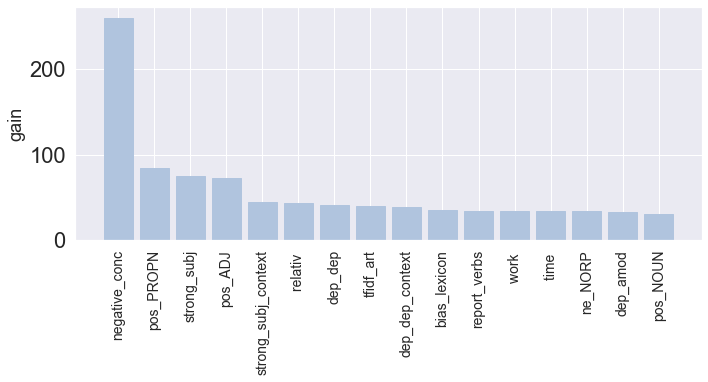

In [116]:
feat_importance_ = feat_imp[feat_imp['score']>=30]

fig, ax = plt.subplots(1, 1, figsize=(10,4))

xticklabels = feat_importance_.feature

ax.bar(np.arange(len(feat_importance_.feature)), feat_importance_.score,
        align='center', color='lightsteelblue', edgecolor='lightsteelblue')
ax.set_xticks(np.arange(len(feat_importance_.feature)))
ax.set_xticklabels(xticklabels, rotation=90, fontsize=14)
#ax.set_title('Features importance', fontsize=20)
ax.set_ylabel('gain', fontsize=18)

fig.show()

In [117]:
zer_imp = list(set(feature_names) - set(feat_importance.feature))
zer_imp

['dep_npadvmod_context',
 'ne_QUANTITY_context',
 'posemo _context',
 'implicative_verbs_context',
 'dep_aux',
 'dep_advcl',
 'ne_PERCENT',
 'dep_punct',
 'attitude_markers_context',
 'reward ',
 'manner_adverbs',
 'netspeak _context',
 'pos_INTJ',
 'dep_aux_context',
 'ne_LOC',
 'dep_nsubjpass_context',
 'sexual _context',
 'bio ',
 'pos_INTJ_context',
 'manner_adverbs_context',
 'dep_prep_context',
 'ne_TIME_context',
 'focusfuture _context',
 'weak_subj_context',
 'ne_WORK_OF_ART_context',
 'discrep ',
 'ne_LOC_context',
 'pos_X',
 'action_verbs',
 'differ _context',
 'ne_EVENT_context',
 'ingest _context',
 'money _context',
 'friend ',
 'ne_LANGUAGE_context',
 'dep_appos',
 'ne_PERSON',
 'dep_dobj',
 'see ',
 'boosters_context',
 'family ',
 'dep_mark_context',
 'dep_preconj',
 'dep_csubj',
 'dep_poss_context',
 'dep_quantmod_context',
 'motion _context',
 'pos_SCONJ_context',
 'ne_EVENT',
 'feel _context',
 'dep_det_context',
 'dep_relcl_context',
 'hear ',
 'risk ',
 'dep_det',


In [118]:
list(feat_importance.feature)

['negative_conc',
 'pos_PROPN',
 'strong_subj',
 'pos_ADJ',
 'strong_subj_context',
 'relativ ',
 'dep_dep',
 'tfidf_art',
 'dep_dep_context',
 'bias_lexicon',
 'report_verbs',
 'work ',
 'time ',
 'ne_NORP',
 'dep_amod',
 'pos_NOUN',
 'dep_compound_context',
 'bias_lexicon_context',
 'dep_npadvmod',
 'dep_advmod',
 'percept ',
 'attitude_markers',
 'relig ',
 'cogproc ',
 'dep_attr',
 'social ',
 'dep_attr_context',
 'focuspresent ',
 'pos_PROPN_context',
 'informal ',
 'pos_VERB',
 'assertive_verbs',
 'dep_conj_context',
 'anger ',
 'space ',
 'drives ',
 'money ',
 'dep_dobj_context',
 'dep_pobj',
 'positive_conc',
 'glove_vec300_norm',
 'pos_ADV',
 'pos_PRON_context',
 'ne_DATE_context',
 'ne_ORG',
 'weak_subj',
 'tentat _context',
 'focuspast ',
 'see _context',
 'comparative_forms',
 'dep_compound',
 'leisure ',
 'dep_prep',
 'drives _context',
 'achieve ',
 'ne_DATE',
 'dep_amod_context',
 'negemo ',
 'sexual ',
 'pos_ADJ_context',
 'dep_acl',
 'power _context',
 'dep_advmod_con

In [8]:
x = df.drop(['label4'], 1)
y4 = df[['label4']]

In [13]:
feature_names = list(x.columns)
print(feature_names)

['glove_vec300_norm', 'tfidf_art', 'negative_conc', 'positive_conc', 'weak_subj', 'strong_subj', 'hyperbolic_terms', 'attitude_markers', 'kill_verbs', 'bias_lexicon', 'action_verbs', 'comparative_forms', 'modal_adverbs', 'manner_adverbs', 'superlative_forms', 'assertive_verbs', 'factive_verbs', 'report_verbs', 'implicative_verbs', 'hedges', 'boosters', 'affect ', 'posemo ', 'negemo ', 'anx ', 'anger ', 'sad ', 'social ', 'family ', 'friend ', 'female ', 'male ', 'cogproc ', 'insight ', 'cause ', 'discrep ', 'tentat ', 'certain ', 'differ ', 'percept ', 'see ', 'hear ', 'feel ', 'bio ', 'body ', 'health ', 'sexual ', 'ingest ', 'drives ', 'affiliation ', 'achieve ', 'power ', 'reward ', 'risk ', 'focuspast ', 'focuspresent ', 'focusfuture ', 'relativ ', 'motion ', 'space ', 'time ', 'work ', 'leisure ', 'home ', 'money ', 'relig ', 'death ', 'informal ', 'swear ', 'netspeak ', 'assent ', 'nonflu ', 'filler ', 'pos_ADJ', 'pos_ADP', 'pos_ADV', 'pos_AUX', 'pos_DET', 'pos_INTJ', 'pos_NOUN',

In [16]:
import xgboost 

In [18]:
train_features, test_features, train_labels, test_labels = train_test_split(x, y, 
                                                                            test_size = 0.10, random_state = 42)
train_features1, val_features, train_labels1, val_labels = train_test_split(train_features, train_labels, 
                                                                            test_size = 0.10, random_state = 42)

In [19]:
dtrain = xgboost.DMatrix(train_features, label=train_labels, feature_names=feature_names)
dtest = xgboost.DMatrix(test_features, label=test_labels, feature_names=feature_names)
dtrain1 = xgboost.DMatrix(train_features1, label=train_labels1, feature_names=feature_names)
dval = xgboost.DMatrix(val_features, label=val_labels, feature_names=feature_names)

In [20]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)
print('Training Features for final model Shape:', train_features1.shape)
print('Training Labels for final model Shape:', train_labels1.shape)
print('Validation Features Shape:', val_features.shape)
print('Validation Labels Shape:', val_labels.shape)

Training Features Shape: (58268, 290)
Training Labels Shape: (58268, 1)
Testing Features Shape: (6475, 290)
Testing Labels Shape: (6475, 1)
Training Features for final model Shape: (52441, 290)
Training Labels for final model Shape: (52441, 1)
Validation Features Shape: (5827, 290)
Validation Labels Shape: (5827, 1)


In [21]:
scale_pos_weight = len(train_labels[train_labels['label4']==0])/len(train_labels[train_labels['label4']==1])
scale_pos_weight

14.253403141361257

In [22]:
params = {
    'max_depth':14,
    'min_child_weight': 1,
    'eta':.3,
    'subsample': 1,
    'colsample_bytree': 1,
    'objective':"binary:logistic",
    'disable_default_eval_metric': 1,
    'seed': 42,
    'tree_method': 'hist',
    'learning_rate': 0.1,
    'scale_pos_weight': scale_pos_weight
}

num_boost_round = 999

In [27]:
def f1_eval(predt: np.ndarray, dtrain: xgboost.DMatrix):
    y = dtrain.get_label()
    predt_binary = np.where(predt > 0.5, 1, 0)
    return "F1_score", metrics.f1_score(y_true=y, y_pred=predt_binary)

In [28]:
gridsearch_params = [
    (max_depth, min_child_weight)
    for max_depth in range(6,8,1)
    for min_child_weight in range(4,41,2)
]

In [29]:
import time
from sklearn import metrics
start_time = time.time()
max_f1 = float(0)
best_params = None
for max_depth, min_child_weight in gridsearch_params:
    print("CV with max_depth={}, min_child_weight={}".format(
                             max_depth,
                             min_child_weight))
    
    params['max_depth'] = max_depth
    params['min_child_weight'] = min_child_weight
    
    cv_results = xgboost.cv(
        params,
        dtrain,
        num_boost_round=num_boost_round,
        seed=42,
        nfold=5,
        feval=f1_eval,
        early_stopping_rounds = 10,
        maximize=True)
    
    mean_f1 = cv_results['test-F1_score-mean'].max()
    boost_rounds = cv_results['test-F1_score-mean'].argmax()
    print("\tF1 {} for {} rounds".format(mean_f1, boost_rounds))
    if mean_f1 > max_f1:
        max_f1 = mean_f1
        best_params = (max_depth,min_child_weight)
print("Best params: {}, {}, F1: {}".format(best_params[0], best_params[1], max_f1))
end_time = time.time()
print('time:', end_time - start_time)

CV with max_depth=6, min_child_weight=4
	F1 0.3471092 for 133 rounds
CV with max_depth=6, min_child_weight=6
	F1 0.34530059999999996 for 117 rounds
CV with max_depth=6, min_child_weight=8
	F1 0.35514720000000005 for 166 rounds
CV with max_depth=6, min_child_weight=10
	F1 0.3494058 for 135 rounds
CV with max_depth=6, min_child_weight=12
	F1 0.35392339999999994 for 141 rounds
CV with max_depth=6, min_child_weight=14
	F1 0.3509894 for 125 rounds
CV with max_depth=6, min_child_weight=16
	F1 0.3448092 for 120 rounds
CV with max_depth=6, min_child_weight=18
	F1 0.35928899999999997 for 195 rounds
CV with max_depth=6, min_child_weight=20
	F1 0.3587726 for 208 rounds
CV with max_depth=6, min_child_weight=22
	F1 0.3610650000000001 for 218 rounds
CV with max_depth=6, min_child_weight=24
	F1 0.3532762 for 185 rounds
CV with max_depth=6, min_child_weight=26
	F1 0.34697419999999995 for 137 rounds
CV with max_depth=6, min_child_weight=28
	F1 0.34657119999999997 for 150 rounds
CV with max_depth=6, min

In [30]:
params['max_depth'] = best_params[0]
params['min_child_weight'] = best_params[1]

In [31]:
gridsearch_params = [
    (subsample, colsample)
    for subsample in [i/10. for i in range(6,11,2)]
    for colsample in [i/10. for i in range(4,11,2)]
]

In [32]:
start_time = time.time()
max_f1 = float(0)
best_params = None

for subsample, colsample in reversed(gridsearch_params):
    print("CV with subsample={}, colsample={}".format(
                             subsample,
                             colsample))
    
    params['subsample'] = subsample
    params['colsample_bytree'] = colsample
    
    cv_results = xgboost.cv(
        params,
        dtrain,
        num_boost_round=num_boost_round,
        seed=42,
        nfold=5,
        feval=f1_eval,
        early_stopping_rounds = 10,
        maximize=True)
    
    mean_f1 = cv_results['test-F1_score-mean'].max()
    boost_rounds = cv_results['test-F1_score-mean'].argmax()
    print("\tF1 {} for {} rounds".format(mean_f1, boost_rounds))
    if mean_f1 > max_f1:
        max_f1 = mean_f1
        best_params = (subsample,colsample)
print("Best params: {}, {}, F1: {}".format(best_params[0], best_params[1], max_f1))
end_time = time.time()
print('time:', end_time - start_time)

CV with subsample=1.0, colsample=1.0
	F1 0.3675338 for 201 rounds
CV with subsample=1.0, colsample=0.8
	F1 0.36507720000000005 for 195 rounds
CV with subsample=1.0, colsample=0.6
	F1 0.35931919999999995 for 169 rounds
CV with subsample=1.0, colsample=0.4
	F1 0.3536552 for 151 rounds
CV with subsample=0.8, colsample=1.0
	F1 0.35022319999999996 for 117 rounds
CV with subsample=0.8, colsample=0.8
	F1 0.349977 for 123 rounds
CV with subsample=0.8, colsample=0.6
	F1 0.34330060000000007 for 127 rounds
CV with subsample=0.8, colsample=0.4
	F1 0.3465952 for 121 rounds
CV with subsample=0.6, colsample=1.0
	F1 0.32962379999999997 for 79 rounds
CV with subsample=0.6, colsample=0.8
	F1 0.3401888 for 142 rounds
CV with subsample=0.6, colsample=0.6
	F1 0.3268726 for 76 rounds
CV with subsample=0.6, colsample=0.4
	F1 0.33349979999999996 for 101 rounds
Best params: 1.0, 1.0, F1: 0.3675338
time: 2056.6084756851196


In [33]:
params['subsample'] = best_params[0]
params['colsample_bytree'] = best_params[1]

In [34]:
start_time = time.time()
max_f1 = float(0)
best_params = None

for eta in [0.3, 0.2, 0.1, 0.01, 0.005]:
    print("CV with eta={}".format(eta))

    params['eta'] = eta

    cv_results = xgboost.cv(
            params,
            dtrain,
            num_boost_round=num_boost_round,
            seed=42,
            nfold=5,
            feval=f1_eval,
            early_stopping_rounds = 10,
            maximize=True)

    mean_f1 = cv_results['test-F1_score-mean'].max()
    boost_rounds = cv_results['test-F1_score-mean'].argmax()
    print("\tF1 {} for {} rounds\n".format(mean_f1, boost_rounds))
    if mean_f1 > max_f1:
        max_f1 = mean_f1
        best_params = eta
print("Best params: {}, F1: {}".format(best_params, max_f1))
end_time = time.time()
print('time:', end_time - start_time)

CV with eta=0.3
	F1 0.3675338 for 201 rounds

CV with eta=0.2
	F1 0.352515 for 153 rounds

CV with eta=0.1
	F1 0.358125 for 377 rounds

CV with eta=0.01
	F1 0.2768712 for 13 rounds

CV with eta=0.005
	F1 0.2763656 for 26 rounds

Best params: 0.3, F1: 0.3675338
time: 687.7740662097931


In [43]:
# optimized hyper-parameters
params = {'max_depth': 14,
 'min_child_weight': 18,
 'eta': 0.3,
 'subsample': 1.0,
 'colsample_bytree': 1.0,
 'objective': 'binary:logistic',
 'disable_default_eval_metric': 1,
 'seed': 42,
 'tree_method': 'hist',
 'learning_rate': 0.1,
 'scale_pos_weight': 14.253403141361257}
num_boost_round=999

In [44]:
xgboost_tuned_weighted = xgboost.train(
    params,
    dtrain1,
    num_boost_round=num_boost_round,
    evals=[(dtrain1, 'dtrain'), (dval, 'dval')],
    feval=f1_eval,
    early_stopping_rounds = 10,
    maximize=True)

[0]	dtrain-F1_score:0.319751	dval-F1_score:0.280576
Multiple eval metrics have been passed: 'dval-F1_score' will be used for early stopping.

Will train until dval-F1_score hasn't improved in 10 rounds.
[1]	dtrain-F1_score:0.335286	dval-F1_score:0.29316
[2]	dtrain-F1_score:0.342796	dval-F1_score:0.300836
[3]	dtrain-F1_score:0.347061	dval-F1_score:0.308375
[4]	dtrain-F1_score:0.355614	dval-F1_score:0.310384
[5]	dtrain-F1_score:0.362083	dval-F1_score:0.310148
[6]	dtrain-F1_score:0.365778	dval-F1_score:0.309972
[7]	dtrain-F1_score:0.371344	dval-F1_score:0.31518
[8]	dtrain-F1_score:0.375258	dval-F1_score:0.31523
[9]	dtrain-F1_score:0.379196	dval-F1_score:0.319716
[10]	dtrain-F1_score:0.386575	dval-F1_score:0.325194
[11]	dtrain-F1_score:0.391461	dval-F1_score:0.326309
[12]	dtrain-F1_score:0.397973	dval-F1_score:0.329083
[13]	dtrain-F1_score:0.40181	dval-F1_score:0.331701
[14]	dtrain-F1_score:0.40437	dval-F1_score:0.331492
[15]	dtrain-F1_score:0.406945	dval-F1_score:0.332512
[16]	dtrain-F1_s

In [64]:
os.chdir('C:/Users/shiva/Desktop/Master_Thesis/final-data')
xgboost_tuned_weighted.save_model("xgboost_tuned_weighted.model")
#xgboost_tuned_weighted = xgboost.Booster()
xgboost_tuned_weighted=xgboost.XGBClassifier()
xgboost_tuned_weighted.load_model("xgboost_tuned_weighted.model")


In [63]:
xgboost_tuned_weighted_predt = np.where(xgboost_tuned_weighted.predict(dtest) > 0.5, 1, 0)
print('Performance of xgboost_tuned_weighted, test:')
print('F1:', round(metrics.f1_score(dtest.get_label(),xgboost_tuned_weighted_predt),2))
print('Precision:', round(metrics.precision_score(dtest.get_label(), xgboost_tuned_weighted_predt),2))
print('Recall:', round(metrics.recall_score(dtest.get_label(), xgboost_tuned_weighted_predt),2))
print('AUC:', round(metrics.roc_auc_score(dtest.get_label(), xgboost_tuned_weighted_predt),2))
print('Accuracy:', round(metrics.accuracy_score(dtest.get_label(), xgboost_tuned_weighted_predt),2))
print('Confusion matrix:\n', 
      metrics.confusion_matrix(dtest.get_label(), xgboost_tuned_weighted_predt).transpose())

Performance of xgboost_tuned_weighted, test:
F1: 0.36
Precision: 0.25
Recall: 0.66
AUC: 0.76
Accuracy: 0.84
Confusion matrix:
 [[5138  151]
 [ 893  293]]


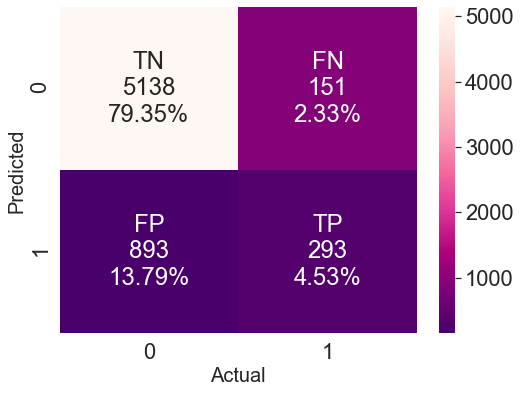

In [47]:
from sklearn import metrics
import seaborn as sns
cf_matrix = metrics.confusion_matrix(dtest.get_label(), xgboost_tuned_weighted_predt)
TN = cf_matrix[0][0]
FN = cf_matrix[1][0]
TP = cf_matrix[1][1]
FP = cf_matrix[0][1]
fl = [TN, FN, FP, TP]
fig, ax = plt.subplots(figsize=(8,6))

sns.set(font_scale=2)
group_names = ['TN','FN','FP','TP']
group_counts = ["{0:0.0f}".format(value) for value in fl]
group_percentages = ["{0:.2%}".format(value) for value in
                     fl/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cf_matrix, annot=labels, fmt='', cmap="RdPu_r")
plt.ylabel('Predicted', fontsize=20)
plt.xlabel('Actual', fontsize=20)
ax.set_ylim([0,2])
ax.invert_yaxis()
plt.savefig('xg_confusion.pdf', bbox_inches="tight")

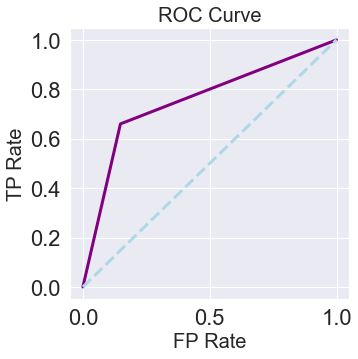

In [48]:
plt.rcParams['font.size'] = 16
plt.subplots(1, 1, figsize=(5,5))

rand_probs = [0 for _ in range(len(dtest.get_label()))]
rand_fpr, rand_tpr, thresholds = metrics.roc_curve(dtest.get_label(), rand_probs)

fpr, tpr, thresholds = metrics.roc_curve(dtest.get_label(), xgboost_tuned_weighted_predt,
                                         pos_label=1)
plt.plot(fpr, tpr, linewidth=3, color='purple')
plt.plot(rand_fpr, rand_tpr, linestyle='--', linewidth=3, color='lightblue')
plt.title("ROC Curve", fontsize=20)
plt.xlabel("FP Rate", fontsize=20)
plt.ylabel("TP Rate", fontsize=20)
plt.savefig('XGB_roc_curve.pdf', bbox_inches="tight")
plt.show()

In [49]:
feat_importance = pd.DataFrame.from_dict(xgboost_tuned_weighted.get_score(importance_type='gain'), orient='index')
feat_importance = feat_importance.reset_index()
feat_importance = feat_importance.rename(columns={"index": "feature", 0: "score"})
feat_importance = feat_importance.sort_values(by=['score'], ascending=False)
    
feat_importance

,feature,score
0,negative_conc,1320.224993
1,pos_PROPN,844.052597
3,pos_ADJ,149.832501
81,dep_nummod_context,114.557361
22,dep_dep_context,99.431065
...,...,...
113,informal _context,12.009972
191,kill_verbs,10.750542
76,anger _context,10.214401
155,health,9.093115


C:\Users\shiva\anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


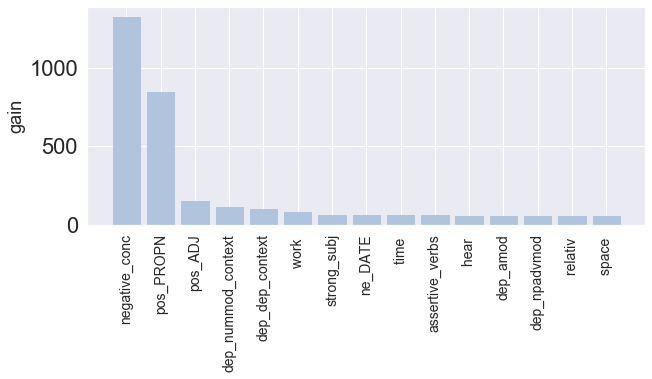

In [50]:
feat_importance = feat_importance[feat_importance['score']>=50]

fig, ax = plt.subplots(1, 1, figsize=(10,4))

xticklabels = feat_importance.feature

ax.bar(np.arange(len(feat_importance.feature)), feat_importance.score,
        align='center', color='lightsteelblue', edgecolor='lightsteelblue')
ax.set_xticks(np.arange(len(feat_importance.feature)))
ax.set_xticklabels(xticklabels, rotation=90, fontsize=14)
#ax.set_title('Features importance', fontsize=20)
ax.set_ylabel('gain', fontsize=18)
plt.savefig('imp.pdf' , bbox_inches="tight")
fig.show()

In [48]:
zer_imp = list(set(feature_names) - set(feat_importance.feature))
zer_imp

['focuspresent _context',
 'pos_ADJ_context',
 'dep_ccomp',
 'body _context',
 'home ',
 'pos_AUX_context',
 'cause ',
 'dep_nsubj_context',
 'pos_X_context',
 'leisure ',
 'sad _context',
 'ingest _context',
 'bio ',
 'pos_DET_context',
 'ne_MONEY',
 'dep_advcl',
 'dep_nsubjpass',
 'ne_FAC',
 'netspeak _context',
 'focuspast ',
 'dep_pcomp',
 'pos_ADP_context',
 'pos_SCONJ_context',
 'dep_prep_context',
 'female _context',
 'social ',
 'anger _context',
 'male _context',
 'positive_conc_context',
 'percept ',
 'drives ',
 'report_verbs',
 'dep_compound',
 'dep_pobj',
 'dep_auxpass',
 'comparative_forms_context',
 'filler _context',
 'ne_GPE',
 'dep_agent',
 'ne_TIME_context',
 'dep_oprd',
 'ne_EVENT_context',
 'work _context',
 'dep_amod_context',
 'reward _context',
 'dep_det',
 'ne_TIME',
 'space _context',
 'dep_expl_context',
 'pos_ADV_context',
 'dep_poss_context',
 'time _context',
 'feel _context',
 'dep_prt_context',
 'dep_punct_context',
 'anx ',
 'affect ',
 'drives _context

In [49]:
list(feat_importance.feature)

['negative_conc',
 'pos_PROPN',
 'pos_ADJ',
 'dep_nummod_context',
 'dep_dep_context',
 'work ',
 'strong_subj',
 'ne_DATE',
 'time ',
 'assertive_verbs',
 'hear ',
 'dep_amod',
 'dep_npadvmod',
 'relativ ',
 'space ']

In [51]:
xgboost_tuned_weighted_predt = np.where(xgboost_tuned_weighted.predict(dtest) > 0.5, 1, 0)
test_labels['pred'] = xgboost_tuned_weighted_predt

err_analysis = pd.merge(pd.concat([test_features, test_labels], axis=1),
         data[['sentence','text','lemma','Bias_words']],
         how='left', 
         left_index=True, right_index=True)

err_analysis['error_type'] = err_analysis.apply(lambda row: 'TP' if row.label4==1 and row.pred==1 else
                                                            'FN' if row.label4==1 and row.pred==0 else
                                                            'FP' if row.label4==0 and row.pred==1 else
                                                            'TN', axis=1)

TP = err_analysis[err_analysis['error_type']=='TP']
FN = err_analysis[err_analysis['error_type']=='FN']
FP = err_analysis[err_analysis['error_type']=='FP']

from random import sample   
for word in sample(list(TP.text),50):
    print(word)

C:\Users\shiva\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


stupid
monster
lazy
extremes
racist
disaster
lackluster
eco
dooming
searing
pro
theory
right
menacing
pro
buffoonish
boasts
lying
masses
prohibitively
killing
patriarchy
brasher
nationalist
suasion
fuming
music
bloated
radicalized
defective
touted
sensitive
nanny
lurches
boasted
lurking
terrorists
depressing
pervasive
rhetoric
botched
blew
willing
oozing
patriarchy
incumbent
sucked
outpaced
horrific
propaganda


In [5]:
os.chdir("C:/Users/shiva/Desktop/Master_Thesis/final-data")
xg_results = pd.read_csv("xg_results.csv")
xg_results

,scoring_func,estimator,lower_bound,upper_bound,stderr
0,Accuracy,0.935409,0.934470,0.936314,0.000532
1,recall_score,0.072194,0.060431,0.085282,0.006221
2,precision_score,0.586043,0.549130,0.617444,0.017611
3,f1_score,0.128410,0.114035,0.145452,0.009691
4,fowlkes_mallows_score,0.936608,0.935881,0.937454,0.000502
5,roc_auc_score,0.534291,0.528881,0.540487,0.002923


In [33]:
xg_results=xg_results.replace('fowlkes_mallows_score', 'G_mean')

In [36]:
xg_results = xg_results.replace('recall_score', 'recall')

In [39]:
xg_results = xg_results.replace('precision_score','precision')

In [40]:
x_axis= xg_results['scoring_func']
y_axis= xg_results['estimator']
ci_low =xg_results['lower_bound']
ci_up = xg_results['upper_bound']
std = xg_results['stderr']

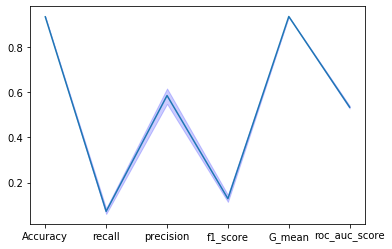

In [42]:
from matplotlib import pyplot as plt
import numpy as np

fig, ax = plt.subplots()
ax.plot(x_axis,y_axis)
ax.fill_between(x_axis, ci_low, ci_up, color='b', alpha=0.2)
fig.savefig('bootstrap_estimate_and_ci_xg_boost.pdf')

In [ ]:
xg_results1 = pd.read_csv("xg_results1.csv")
xg_results1

In [66]:
import numpy as np
from mlxtend.evaluate import bootstrap_point632_score


def bootstrap_estimate_and_ci(estimator, train_features, train_labels, scoring_func=None, random_seed=0, 
                              method='.632', alpha=0.05, n_splits=50):
    scores = bootstrap_point632_score(estimator, X, y, scoring_func=scoring_func, 
                                      n_splits=n_splits, random_seed=random_seed, 
                                      method=method)
    estimate = np.mean(scores)
    lower_bound = np.percentile(scores, 100*(alpha/2))
    upper_bound = np.percentile(scores, 100*(1-alpha/2))
    stderr = np.std(scores)
    
    return estimate, lower_bound, upper_bound, stderr


#================#
#    Examples    #
#================#
from sklearn.base import clone
from sklearn.datasets import make_classification
from xgboost import XGBClassifier
from sklearn.metrics import recall_score, f1_score, precision_score, roc_auc_score, fowlkes_mallows_score
import xgboost
x_axis = []
y_axis = []
ci_low = []
ci_up = []

# X = x.to_numpy()
# y = y.to_numpy()
# y = np.array([x[0] for x in y])

# X, y = make_classification(n_redundant=0)
estimator = XGBClassifier()

# Calculate a bootstrap estimate for accuracy and a 95% confidence interval
est, low, up, stderr = bootstrap_estimate_and_ci(estimator, train_features, train_labels)


print(f"estimate: {est:.2f}, confidence interval: [{low:.2f}, {up:.2f}], "
      f"standard error: {stderr:.2f}")

xg_results1 = pd.read_csv("xg_results1.csv")
xg_results1.loc[xg_results1.shape[0]] = ["Accuracy", est, low, up, stderr]
xg_results1.to_csv("xg_results1.csv", index=False)

KeyboardInterrupt: 